# Importando librerias

In [1]:
# Librerías básicas para manejo de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para análisis de textos:
# nltk, para eliminar stopwords
# spacy, para preprocesamiento
import stanza # para preprocesamiento, computacionalmente costoso aunque mejores resultados
# gensim, para modelamiento

# Preprocesamiento
import re, string

# Conteo de palabras
from collections import Counter

# Iteraciones
import itertools

# Para presentación vía nubes de palabras
from wordcloud import WordCloud

p:\maestria-data_science\ciclo I\c2-2-MLNoSupervisado\s7-mineriaTextos\mineriaTextos\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importando datos (archivos pdf)

In [17]:
import os
from tika import parser

# Cambiar al directorio donde se encuentran los archivos PDF
directorio = "P:/maestria-data_science/ciclo I/c2-2-MLNoSupervisado/s7-mineriaTextos/mineriaTextos/data/raw"
os.chdir(directorio)

# Obtener lista de archivos PDF en el directorio
archivos_pdf = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.pdf')]

# Inicializar listas para almacenar los títulos y textos de los archivos PDF
titulos = []
textos = []

# Recorrer cada archivo PDF y extraer su título y texto
for archivo in archivos_pdf:
    # Obtener el título del archivo
    titulo = archivo[:-4]
    
    # Extraer texto del archivo PDF y convertirlo a minúsculas
    pdf = parser.from_file(archivo)
    texto_pdf = pdf.get('content', '').lower()
    
    # Agregar el título y texto a las listas correspondientes
    titulos.append(titulo)
    textos.append(texto_pdf)

# Calcular la longitud de cada texto
longitudes = [len(texto) for texto in textos]

# Imprimir los resultados
print("Número de textos:", len(textos))
print()
print("Títulos:", titulos)
print()
print("Largo de los papers:", longitudes)
print()


Número de textos: 23

Títulos: ['Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019', 'Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011', 'Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010', 'Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017', 'Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005', 'Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016', 'Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006', 'Paper España Resumen I Analisis Valoraciones Sentitext 2010', 'Paper España Mineria Opiniones EmotiBlog 2011', 'Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016', 'Paper España articulo Minera  deOpiniones ANEW 2016', 'Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013', 'Paper España Analisis de sentimientos ontologico 2017', 'Paper

Verificando el contenido del primer texto:

In [18]:
# Imprimir tipo de datos del primer texto
print("Tipo de datos del primer texto:", type(textos[0]))

# Imprimir ejemplo del primer texto
print("Ejemplo del primer texto:")
print(textos[0])

Tipo de datos del primer texto: <class 'str'>
Ejemplo del primer texto:








































fluoruro, ioduro y cloruro


revista científica de la ucsa, vol.6 n.o1 abril, 2019: 49-64  49 

10.18004/ucsa/2409-8752/2019.006(01)049-064 

*autor correspondiente: max schwarz. universidad de lima. peru 

email: mschwarz@ulima.edu.pe 

fecha de recepción: 13/11/2018; fecha de aceptación: 28/02/2019 

articulo original 

 
redes neuronales para predecir el comportamiento del conjunto 

de activos financieros más líquidos del mercado de valores 

peruano 
neural networks to predict the behavior of the most liquid 

financial asset set of the peruvian securities market 
 

bellido, b.1; *schwarz, m.2 
 

1universidad de lima. peru 
 

resumen 
la presente investigación tiene como propósito identificar una herramienta de 
inteligencia artificial basada en redes neuronales para predecir el 
comportamiento de rendimiento y riesgo del conjunto de activos financieros 
basados en ac

# Acortando el texto a utilizar

In [19]:
# Inicializar listas para almacenar los índices de bibliografía y resumen en cada texto
bibliografia_indices = []
resumen_indices = []

# Recorrer cada texto para encontrar los índices de la bibliografía y el resumen
for texto in textos:
    # Encontrar el índice de la bibliografía
    indice_bibliografia = max(texto.rfind("bibliografía"), texto.rfind("referencias"), texto.rfind("bibliograf́ıa"))
    bibliografia_indices.append(indice_bibliografia)

    # Encontrar el índice del resumen
    indice_resumen = texto.find("resumen")
    if indice_resumen == -1:
        # Si no se encuentra "resumen", verificar la versión con espacios entre letras
        indice_resumen = texto.find("r e s u m e n")
    resumen_indices.append(indice_resumen)

# Imprimir los índices de bibliografía y resumen para cada texto (opcional)
print("Índices de bibliografía:", bibliografia_indices)
print("Índices de resumen:", resumen_indices)

Índices de bibliografía: [34520, 44022, 13445, 43354, 32700, 21542, 31238, 34746, 33396, 55390, 26464, 25896, 23635, 28018, 14030, 38580, 13578, 36443, 71487, 25957, 29720, 49443, 49661]
Índices de resumen: [682, 1163, 1238, 382, 613, 573, 5147, 464, 612, 9056, 4611, 757, 1908, 658, 513, 1281, 1828, 1954, 74275, 881, 1895, 452, 4813]


Verificando nuevo largo de los textos:

In [20]:
# Acortar cada texto desde el índice del resumen hasta el índice de la bibliografía
for i in range(len(textos)):
    textos[i] = textos[i][resumenes[i]:bibliografias[i]]

# Calcular la longitud de cada texto acortado
largo_papers = [len(texto) for texto in textos]

# Imprimir los nuevos largos de los papers
print("Nuevo Largo de los papers:", largo_papers)

Nuevo Largo de los papers: [33838, 42859, 12207, 42972, 32087, 20969, 26091, 34282, 32784, 46334, 21853, 25139, 21727, 27360, 13517, 37299, 11750, 34489, 0, 25076, 27825, 48991, 44848]


Mostrando el primer texto acortado:

In [21]:
print("Ejemplo del primer texto \n")
print(textos[0])

Ejemplo del primer texto 

resumen 
la presente investigación tiene como propósito identificar una herramienta de 
inteligencia artificial basada en redes neuronales para predecir el 
comportamiento de rendimiento y riesgo del conjunto de activos financieros 
basados en acciones que reflejen con mayor exactitud el movimiento bursátil 
del mercado de valores peruano. la investigación identificó inicialmente el 
activo financiero más apropiado para estimar los valores de rendimiento y 
riesgo de la cartera de acciones 50% más liquida del mercado peruano en el 
período 2010-2016. a partir del activo seleccionado se utilizó la técnica de redes 
neuronales artificiales con un perceptrón multicapa con regresión configurado 
con 3 capas (21,85,2) usando una función de activación logística con un 
optimizador lbfgs a una taza de aprendizaje de 0.01 para establecer los 
patrones financieros, operacionales, comerciales o de gobierno corporativo que 
puedan explicar y/o predecir el comportamiento

#### Los cargamos a un dataframe

In [29]:
df = pd.DataFrame([titulos, textos], index = ['Titulos','Texto']).T

In [30]:
df

Titulos  \
0   Paper Peru Redes neuronales para predecir acti...   
1   Paper Mexico redes neuronales artificiales pro...   
2   Paper Mexico Pronósticos para el Rendimiento D...   
3   Paper Mexico EvaluacionDeDestinosTuristicos Ci...   
4   Paper Mexico Clasificación de Defectos en Made...   
5   Paper Mexico Analisis de sentimientos basado e...   
6   Paper España Técnicas Difusas y No-difusas par...   
7   Paper España Resumen I Analisis Valoraciones S...   
8       Paper España Mineria Opiniones EmotiBlog 2011   
9   Paper España Fiabilidad Comentarios TripAdviso...   
10  Paper España articulo Minera  deOpiniones ANEW...   
11  Paper España Articulo de Los Impactos Del Ewom...   
12  Paper España Analisis de sentimientos ontologi...   
13  Paper Ecuador Predicción de Caudales Basados  ...   
14  Paper Ecuador Analisis De Clusteres Para La Cl...   
15  Paper Cuba SemClustDML Agrupar artículos cient...   
16  Paper ColomhiavModelado de ratas en laberintos...   
17  Paper Colombia Modelado precio del cafe colomb...   
18  Paper Colombia Clusters como un modelo en el d...   
19  Paper Colombia Aplicación de Redes Neuronales ...   
20  Paper Colombia Analisis Cluster como tecnica e...   
21  Paper Bolivia Clustering, mediterraneidad y co...   
22  Paper Argentina Analisis Numerico de diferente...   

                                                Texto  
0   resumen \nla presente investigación tiene como...  
1   resumen— el amplio uso de las redes neuronales...  
2   resumen\n\nen el presente trabajo se desarroll...  
3   resumen: se presentan resultados de un estudio...  
4   resumen\n\neste artículo describe un clasifica...  
5   resumen. con el crecimiento de los usuarios de...  
6   resumen \n\n \nen este artículo comparamos dos...  
7   resumen: en este trabajo describimos la primer...  
8   resumen: emotiblog es una colección de entrada...  
9   resumen\n\nel presente estudio analiza el elec...  
10  resumen: la minería de opiniones (mo) ha mostr...  
11  resumen \n\nel objetivo de este trabajo es la ...  
12  resumen: en este art́ıculo se presenta un sist...  
13  resumen: la aplicación de modelos matemáticos ...  
14  resumen \n\nel artículo tuvo como objetivo apl...  
15  resumen \n\nel agrupamiento de datos se ha con...  
16  resumen \nel estudio del comportamiento de una...  
17  resumenresumenresumenresumen \n \n\nen este ar...  
18                                                     
19  resumen \n \nen este trabajo se presenta la cr...  
20  resumen\n\nse  presenta  con este estudio la a...  
21  resumen\n\nel tema de la mediterraneidad ha ge...  
22  resumen. en el presente trabajo se analizan di...

# Limpieza de datos

In [31]:
def limpiar_saltos_de_linea(texto):
    """
    Elimina los saltos de línea y de página del texto.

    Args:
        texto (str): Texto al que se le aplicará la limpieza.

    Returns:
        str: Texto limpio sin saltos de línea y de página.
    """
    if texto is None:
        return ''
    # Reemplazar saltos de línea y de página por espacios
    texto = texto.replace('\\n', ' ')
    texto = texto.replace('\\t', ' ')
    # Unir las palabras del texto limpio
    return ' '.join(word for word in texto.split())


# Aplicar la función limpiar_saltos_de_linea a la columna 'Texto' del DataFrame df
df['Texto'] = df['Texto'].apply(limpiar_saltos_de_linea)

# Analisis Semántico

https://www.scielo.br/j/rbla/a/ZWRxRK4dyLptHd899xxmQxd/?lang=es
    
Diversidad Léxica: la proporción de palabras diferentes del total de palabras de una composición <br>
Densidad Léixca: relación de las palabras nocionales, es decir con contenido semántico (sustantivos, verbos, adjetivos, adverbios) con respecto al total de palabras

In [11]:
df1 = df.copy()

In [12]:
# En el análisis semántico no se retira stopwords

#### Función para hacer limpieza

In [13]:
from collections import Counter
import es_core_news_sm #función en español
nlp = es_core_news_sm.load() # para el tipo de palabra

In [14]:
#Limpiar texto
def limpiar_texto_1(text):
    if text is None:
        return ''
    text = text.replace('\\n', " ")
    text = text.replace('\\t', " ")
    text = text.replace('\-'," ")     
    text = text.replace('\\'," ")                    
    text = str(text).replace("nan",'').lower() #"Hacer las palabras en minusculas"
   #  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) #Remover signos de puntuación
   # text = re.sub('“', '',text) #Remover comillas dobles
   # text = re.sub(r'\w*\d\w*', '', text) #Remover palabras que contengan numeros
    return ' '.join(word for word in text.split())

In [15]:
#Extraer el tipo
def extraer_tipo(w,tipo):
    frase = []
    for i in nlp(w):
        if i.pos_ ==  tipo:
            frase.append(i.text)
    return ' '.join(word for word in frase)

def extraer_nocionales(w):
    frase = []
    for i in nlp(w):
        if i.pos_ ==  'NOUN' or i.pos_ ==  'VERB' or  i.pos_ ==  'ADJ' or  i.pos_ ==  'ADV':
            frase.append(i.text)
    return ' '.join(word for word in frase)

In [16]:
df1['Texto_Limpio'] = df1['Texto'].apply(lambda x: limpiar_texto_1(x))

In [17]:
#Revisar palabras a mantener
#coleccion1 = Counter()
#df1['Texto_Limpio'].str.lower().str.split().apply(coleccion1.update)
#df_tmp = pd.DataFrame.from_dict(coleccion1, orient='index').reset_index()
#df_tmp.to_excel('revisar.xlsx')

In [18]:
%%time
#Extraemos por tipo
# 1 a 2 min
df1["Sustantivos"] = df1.apply(lambda x: extraer_tipo(x['Texto_Limpio'],'NOUN'), axis=1)
df1["Verbos"] = df1.apply(lambda x: extraer_tipo(x['Texto_Limpio'],'VERB'), axis=1)
df1["Adjetivos"] = df1.apply(lambda x: extraer_tipo(x['Texto_Limpio'],'ADJ'), axis=1)
df1["Adverbios"] = df1.apply(lambda x: extraer_tipo(x['Texto_Limpio'],'ADV'), axis=1)

Wall time: 1min 10s


In [19]:
%%time
# 1 a 2 min
df1["Nocionales"] = df1.apply(lambda x: extraer_nocionales(x['Texto_Limpio']), axis=1)

Wall time: 17.6 s


In [20]:
df1.head()

Titulos  \
0  Paper Argentina Analisis Numerico de diferente...   
1  Paper Bolivia Clustering, mediterraneidad y co...   
2  Paper Colombia Analisis Cluster como tecnica e...   
3  Paper Colombia Aplicación de Redes Neuronales ...   
4  Paper Colombia Clusters como un modelo en el d...   

                                               Texto  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                        Texto_Limpio  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                         Sustantivos  \
0  resumen trabajo metodologías criterios análisi...   
1  tema mediterraneidad interés debate actores he...   
2  estudio aplicación análisis método datos regis...   
3  resumen trabajo creación entornos redes evi di...   
4  artículo finalidad potencialidades implicacion...   

                                              Verbos  \
0  realizar tiene formar sean parecidos analiza r...   
1  generado estudia aplica detectar aliviado impl...   
2  presenta empleó ron centroide consistió compro...   
3  presenta realiza enfoca hace hace selecciona i...   
4  tiene establecer traería pretende definir cons...   

                                           Adjetivos  \
0  presente multivariados distintos restantes gra...   
1  geopolítico bolivia principales junto nuevas a...   
2  exploratorio múltiples pluviométrica multivari...   
3  virtuales inteligentes neuronales artificiales...   
4  presente electrónicos posible dichas empleada ...   

                                           Adverbios  \
0  internamente así también dentro finalmente así...   
1  dentro no no poco además necesariamente antes ...   
2  no no también no no muy no tanto aparte signif...   
3  primero luego finalmente muy sólo muy ampliame...   
4  además no na no no no intencionalmente tanto c...   

                                          Nocionales  
0  resumen presente trabajo metodologías criterio...  
1  tema mediterraneidad generado interés debate g...  
2  presenta estudio aplicación análisis método ex...  
3  resumen trabajo presenta creación entornos vir...  
4  presente artículo tiene finalidad establecer p...

In [21]:
# Limpieza más profunda (signos de puntuación, números, errores de 1,2,3 caracteres)

#Limpiar texto
def limpiar_texto_2 (text):
    if text is None:
        return ''
    text = text.replace('\\n', " ")
    text = text.replace('\\t', " ")
    text = str(text).replace("nan",'').lower() #"Hacer las palabras en minusculas"
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) #Remover signos de puntuación
    text = re.sub('“', '',text) #Remover comillas dobles
    text = re.sub(r'\w*\d\w*', '', text) #Remover palabras que contengan numeros
    return ' '.join(word for word in text.split())

# Remover palabras de 1 a 3 letras, salvo excepciones (items)
#Ayuda a remover errores al procesar y stopwords en ingles

items1 = ['a','e','o','u','y']  #Caracteres extraños

#Conservar para corregir o se quedan porque existe la palabra largo =2
items2 = ['de','la','en','el','se','un','es','al','no','su','lo','et','si','ha','ya','to','le',
          'sí','va','da','do','ni','ti','ac','an','so','mo','v2','ar','te','ho','dr','ed','nº','it','ve','xi',
          'ca','or','f1','vi','mm','oh','na','cm','ma','ce','os','em','él','tu','di','co','us','kg','si']

#Conservar para corregir o se quedan porque existe la palabra largo = 3
items3 = ['los','que','las','del','con','una','por','más','son','dos','red','sus','ser','and','sin','han','tal','mes',
          'muy','fue','uso','uno','así','vez','rna','sea','nos','web','tal','hay','año','fin','les','ojo','big','pie',
          'mlp','tic','san','ese','cnn','pam','tan','som','rnn','par','ver','qué','usa','van','has','era','sal','vía',
          'aún','pos','dar','tos','rbf','usd','pln','jrc','swn','vol','set','aed','día','wom','box','key','río','mas',
          'dad','hoy','das','eje','not','dio','dec','ven','sos','dan','new','use','ahí','sur','min','bio','sig','sol',
          'sub','mae','rpm','snn','crm','scm','cos','luz','vía','tbc','xml','due','air','etl','bar','ésa','mba','spa',
          'mal','mse','pan','svs','pro','ann','tba','allí','aun','den','svm','tba','une','tes','usó'
          'tir','ene','mil','api','etc','fnn','wei','roe','roa','sis']

def remover_cortos(text):
    sent =[]
    text = text.split(" ")
    doc = list(text)
    for word in doc:
        if len(word) > 3:
            sent.append(word)     
        elif (len(word)==1 and word in items1):
            sent.append(word)              
        elif (len(word)==2 and word in items2):
            sent.append(word)
        elif (len(word)==3 and word in items3):
            sent.append(word)    
    return  " ".join(sent)

items = ['issn']

def remover(text):
    sent =[]
    text = text.split(" ")
    doc = list(text)
    for word in doc:
        if word not in items:
            sent.append(word)
            
    return  " ".join(sent)

In [22]:
df1['Texto_Limpio'] = df1['Texto'].apply(lambda x: limpiar_texto_2(x))

In [23]:
# Limpieza más profunda
df1['Sustantivos'] = df1['Sustantivos'].apply(lambda x: limpiar_texto_2(x))
df1['Sustantivos'] = df1['Sustantivos'].apply(lambda x: remover_cortos(x))
df1['Sustantivos'] = df1['Sustantivos'].apply(lambda x: remover(x))

df1['Verbos'] = df1['Verbos'].apply(lambda x: limpiar_texto_2(x))
df1['Verbos'] = df1['Verbos'].apply(lambda x: remover_cortos(x))
df1['Verbos'] = df1['Verbos'].apply(lambda x: remover(x))

df1['Adjetivos'] = df1['Adjetivos'].apply(lambda x: limpiar_texto_2(x))
df1['Adjetivos'] = df1['Adjetivos'].apply(lambda x: remover_cortos(x))
df1['Adjetivos'] = df1['Adjetivos'].apply(lambda x: remover(x))

df1['Adverbios'] = df1['Adverbios'].apply(lambda x: limpiar_texto_2(x))
df1['Adverbios'] = df1['Adverbios'].apply(lambda x: remover_cortos(x))
df1['Adverbios'] = df1['Adverbios'].apply(lambda x: remover(x))

df1['Nocionales'] = df1['Nocionales'].apply(lambda x: limpiar_texto_2(x))
df1['Nocionales'] = df1['Nocionales'].apply(lambda x: remover_cortos(x))
df1['Nocionales'] = df1['Nocionales'].apply(lambda x: remover(x))

In [24]:
coleccion1 = Counter()
df1['Sustantivos'].str.lower().str.split().apply(coleccion1.update)
coleccion2 = Counter()
df1['Verbos'].str.lower().str.split().apply(coleccion2.update)
coleccion3 = Counter()
df1['Adjetivos'].str.lower().str.split().apply(coleccion3.update)
coleccion4 = Counter()
df1['Adverbios'].str.lower().str.split().apply(coleccion4.update)
print('finalizado')

finalizado


In [25]:
#Diversidad Léxica DataSet
diccionario = ""
diccionario = Counter()
df1['Texto_Limpio'].str.lower().str.split().apply(diccionario.update)

V = len(diccionario)
N = sum(diccionario.values())
LV = V/N
print("Palabras Unicas ", V)
print("Palabras totales ", N)
print("Diversidad Léxica ", round(LV,4))

Palabras Unicas  11415
Palabras totales  105575
Diversidad Léxica  0.1081


In [26]:
#Densidad Lexica Dataset

diccionario2 = ""
diccionario2 = Counter()
df1['Nocionales'].str.lower().str.split().apply(diccionario2.update)

PN_U= len(diccionario2)
PN  = sum(diccionario2.values())

DL = PN/N

print("Palabras Unicas Nocionales", PN_U)
print("Palabras Nocionales ", PN)
print("Densidad Léxica ", round(DL,4))


Palabras Unicas Nocionales 7427
Palabras Nocionales  45498
Diversidad Léxica  0.431


In [27]:
tipo_palabra = ['Sustantitvos','Verbos','Adjetivos','Adverbios']
total_palabra = [sum(coleccion1.values()),sum(coleccion2.values()),sum(coleccion3.values()),sum(coleccion4.values())]
unicas = [len(coleccion1),len(coleccion2),len(coleccion3),len(coleccion4)]
resumen = pd.DataFrame([tipo_palabra,total_palabra,unicas], index = ['Tipo','Nro_Total','Nro_Unicas']).T
resumen

Tipo Nro_Total Nro_Unicas
0  Sustantitvos     25911       3150
1        Verbos      7581       2176
2     Adjetivos      9459       2471
3     Adverbios      2547        261

In [28]:
def unicas(X):
    X = X.split()
    unicas = len(Counter(X).keys())
    return unicas

In [29]:
#Variables para el calculo de diversidad y densidad
df1['Palabras_Totales(N)'] = df1.Texto_Limpio.apply(lambda x: len(x.split()))
df1['Palabras_Unicas(V)'] = df1['Texto_Limpio'].apply(lambda x: unicas(x))
df1['Palabras_nocionales(DL)'] = df1.Nocionales.apply(lambda x: len(x.split()))

In [30]:
#diversidad y densidad Léxica
df1['Diversidad'] = round(df1['Palabras_Unicas(V)']/df1['Palabras_Totales(N)'] ,4)
df1['Densidad'] = round(df1['Palabras_nocionales(DL)'] /df1['Palabras_Totales(N)'] ,4)

In [31]:
print("Promedio Diversidad", round(df1['Diversidad'].mean(),4))
print("Promedio Densidad", round(df1['Densidad'].mean(),4))

Promedio Diversidad 0.2592
Promedio Densidad 0.4306


In [32]:
df1.head()

Titulos  \
0  Paper Argentina Analisis Numerico de diferente...   
1  Paper Bolivia Clustering, mediterraneidad y co...   
2  Paper Colombia Analisis Cluster como tecnica e...   
3  Paper Colombia Aplicación de Redes Neuronales ...   
4  Paper Colombia Clusters como un modelo en el d...   

                                               Texto  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                        Texto_Limpio  \
0  resumen en el presente trabajo se analizan dif...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                         Sustantivos  \
0  resumen trabajo metodologías criterios análisi...   
1  tema mediterraneidad interés debate actores he...   
2  estudio aplicación análisis método datos regis...   
3  resumen trabajo creación entornos redes diagnó...   
4  artículo finalidad potencialidades implicacion...   

                                              Verbos  \
0  realizar tiene formar sean parecidos analiza r...   
1  generado estudia aplica detectar aliviado impl...   
2  presenta empleó centroide consistió comprobar ...   
3  presenta realiza enfoca hace hace selecciona i...   
4  tiene establecer traería pretende definir cons...   

                                           Adjetivos  \
0  presente multivariados distintos restantes gra...   
1  geopolítico bolivia principales junto nuevas a...   
2  exploratorio múltiples pluviométrica multivari...   
3  virtuales inteligentes neuronales artificiales...   
4  presente electrónicos posible dichas empleada ...   

                                           Adverbios  \
0  internamente así también dentro finalmente así...   
1  dentro no no poco además necesariamente antes ...   
2  no no también no no muy no tanto aparte signif...   
3  primero luego finalmente muy sólo muy ampliame...   
4  además no na no no no intencionalmente tanto c...   

                                          Nocionales  Palabras_Totales(N)  \
0  resumen presente trabajo metodologías criterio...                 6522   
1  tema mediterraneidad generado interés debate g...                 6818   
2  presenta estudio aplicación análisis método ex...                 4188   
3  resumen trabajo presenta creación entornos vir...                 3811   
4  presente artículo tiene finalidad establecer p...                10705   

   Palabras_Unicas(V)  Palabras_nocionales(DL)  Diversidad  Densidad  
0                1513                     2887      0.2320    0.4427  
1                1463                     2987      0.2146    0.4381  
2                1152                     1805      0.2751    0.4310  
3                1003                     1656      0.2632    0.4345  
4                2547                     4240      0.2379    0.3961

### Gráficos de Análisis semántico

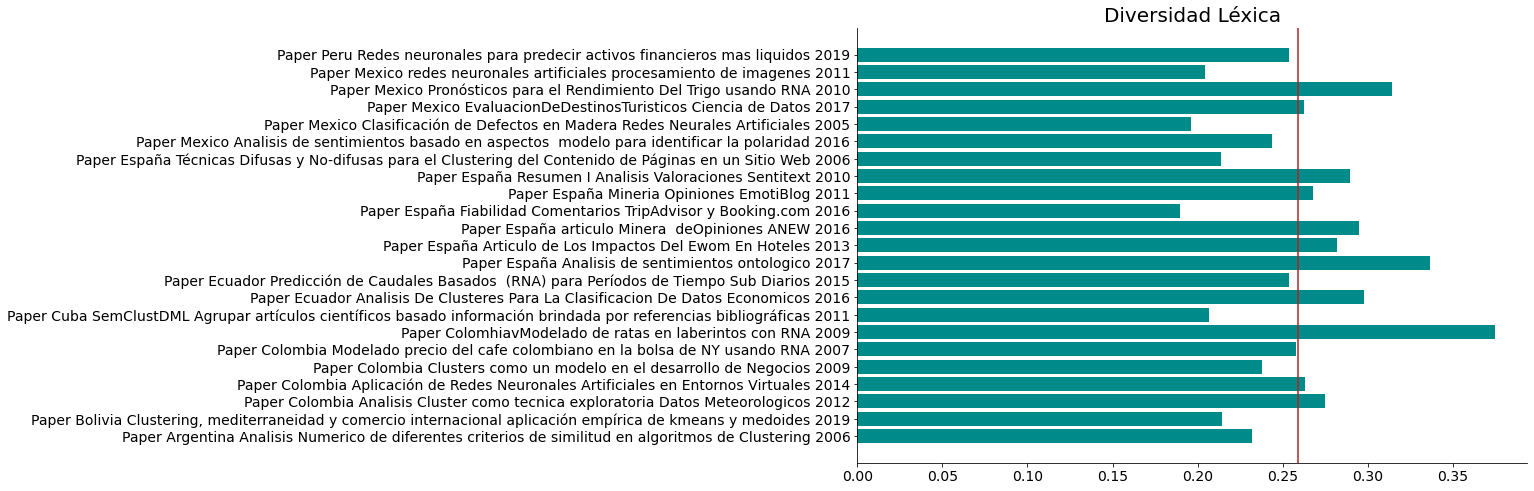

In [33]:
plt.figure(figsize=(12,8))
ax = plt.subplot(111)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.barh(df1['Titulos'],df1['Diversidad'],color = 'darkcyan')
plt.title('Diversidad Léxica',fontsize=20 )
plt.axvline(x=df1['Diversidad'].mean(), color = 'firebrick')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

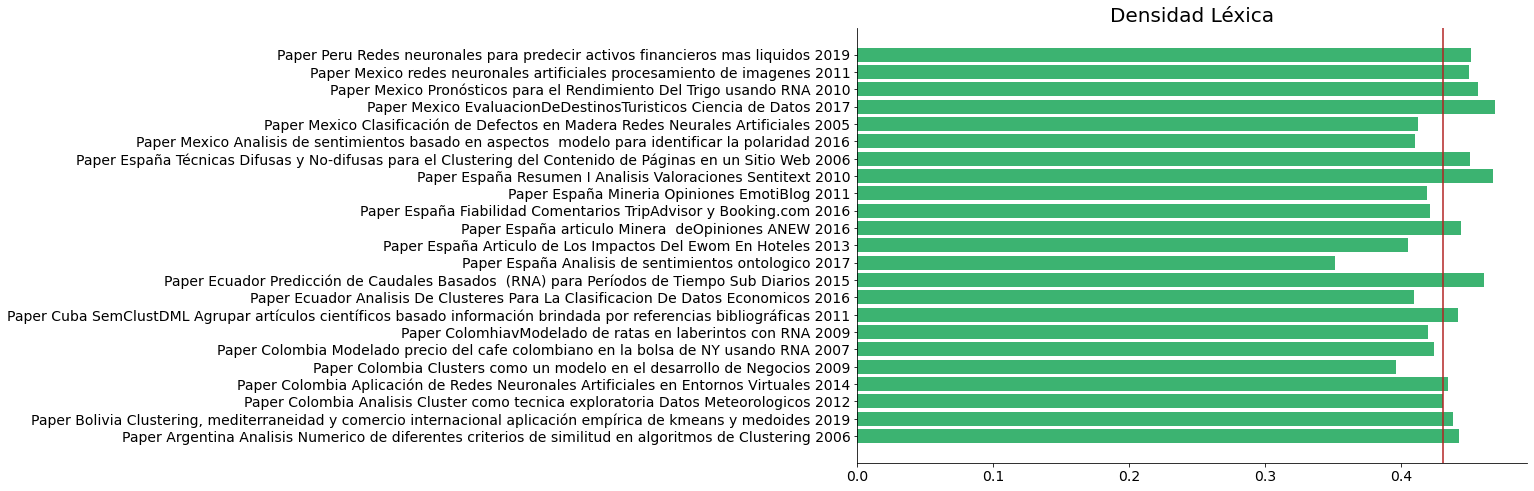

In [34]:
plt.figure(figsize=(12,8))
ax = plt.subplot(111)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.barh(df1['Titulos'],df1['Densidad'],color = 'mediumseagreen')
plt.title('Densidad Léxica',fontsize=20 )
plt.axvline(x=df1['Densidad'].mean(), color = 'firebrick')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

Sustantivos


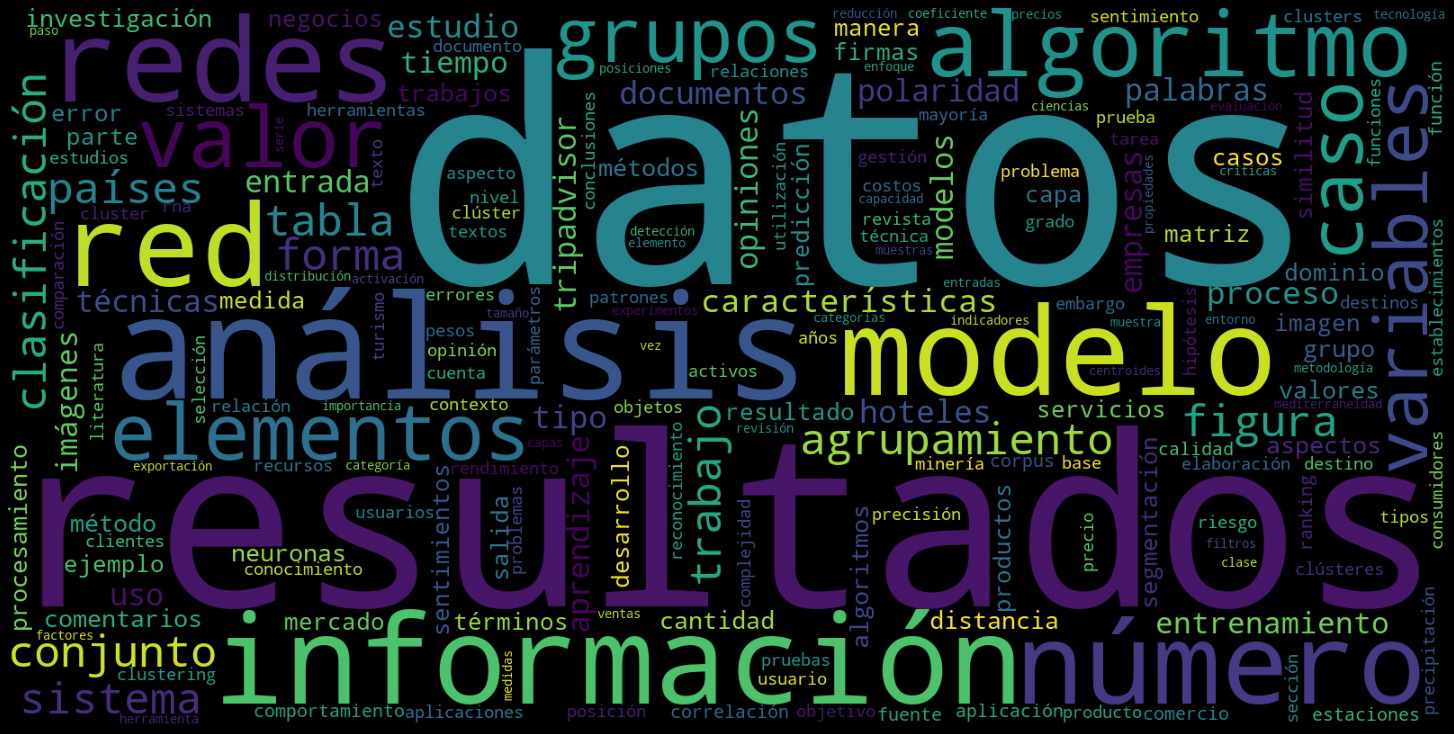

In [35]:
print('Sustantivos')
nube = WordCloud()
wordcloud1 = WordCloud(width=1600, height=800).generate_from_frequencies(frequencies=coleccion1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

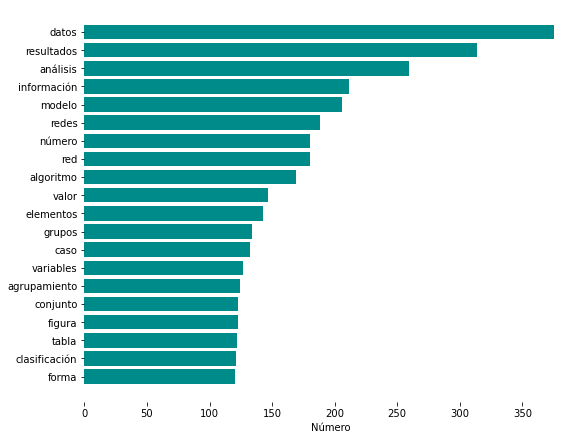

In [36]:
top20 = pd.Series(' '.join(df1['Sustantivos']).lower().split()).value_counts()[:20]
fig = plt.figure(figsize=(8, 6),constrained_layout=True)
#plt.title('Top 20 Palabras más usadas',fontsize=15,fontweight='bold')
plt.barh(top20.index,top20, color = 'darkcyan')
plt.gca().invert_yaxis()
plt.xlabel('Número')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()   

Verbos


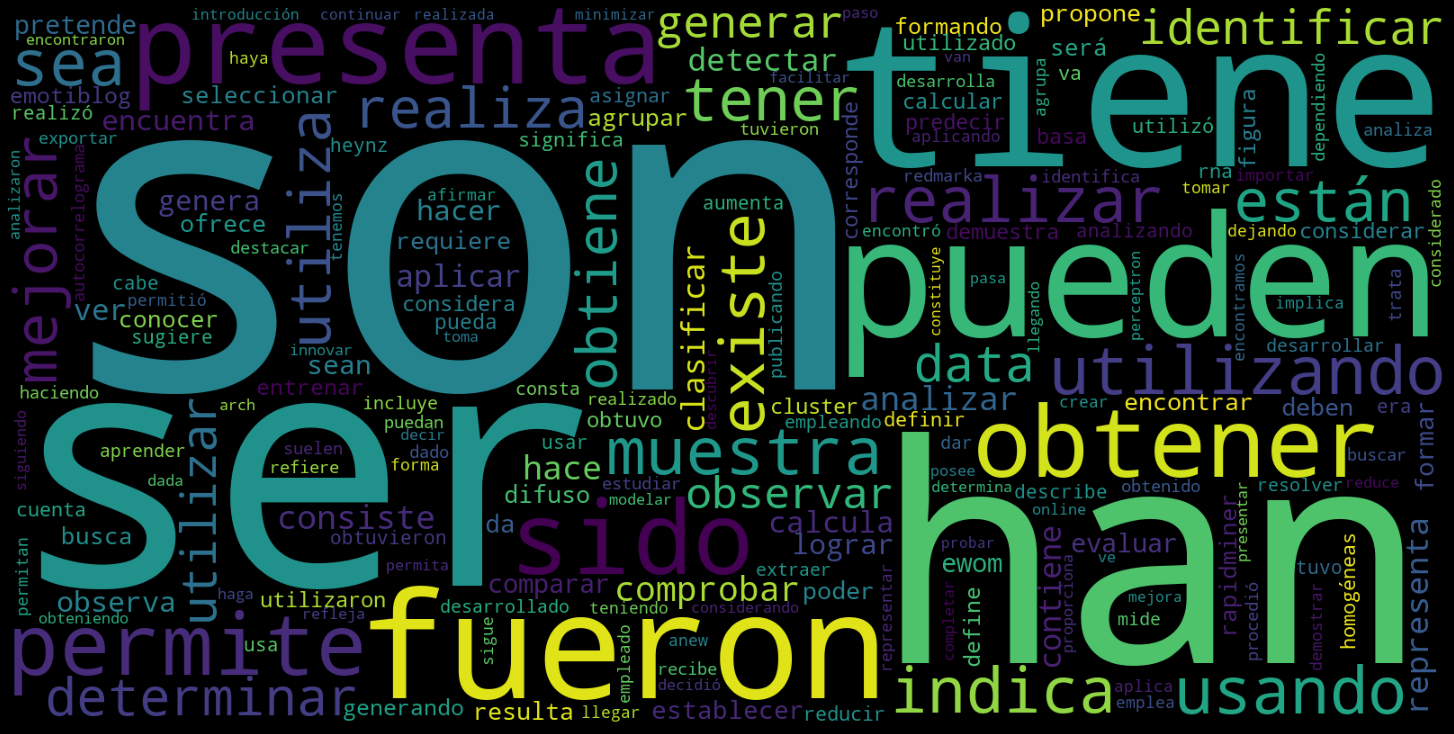

In [37]:
print('Verbos')
nube = WordCloud()
wordcloud1 = WordCloud(width=1600, height=800).generate_from_frequencies(frequencies=coleccion2)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

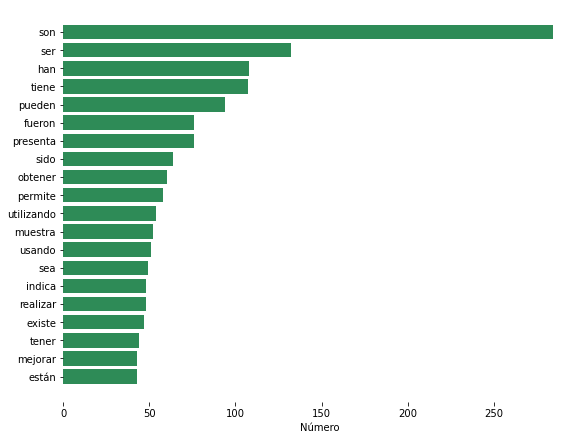

In [38]:
top20 = pd.Series(' '.join(df1['Verbos']).lower().split()).value_counts()[:20]
fig = plt.figure(figsize=(8, 6),constrained_layout=True)
#plt.title('Top 20 Palabras más usadas',fontsize=15,fontweight='bold')
plt.barh(top20.index,top20, color = 'seagreen')
plt.gca().invert_yaxis()
plt.xlabel('Número')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()   

Adjetivos


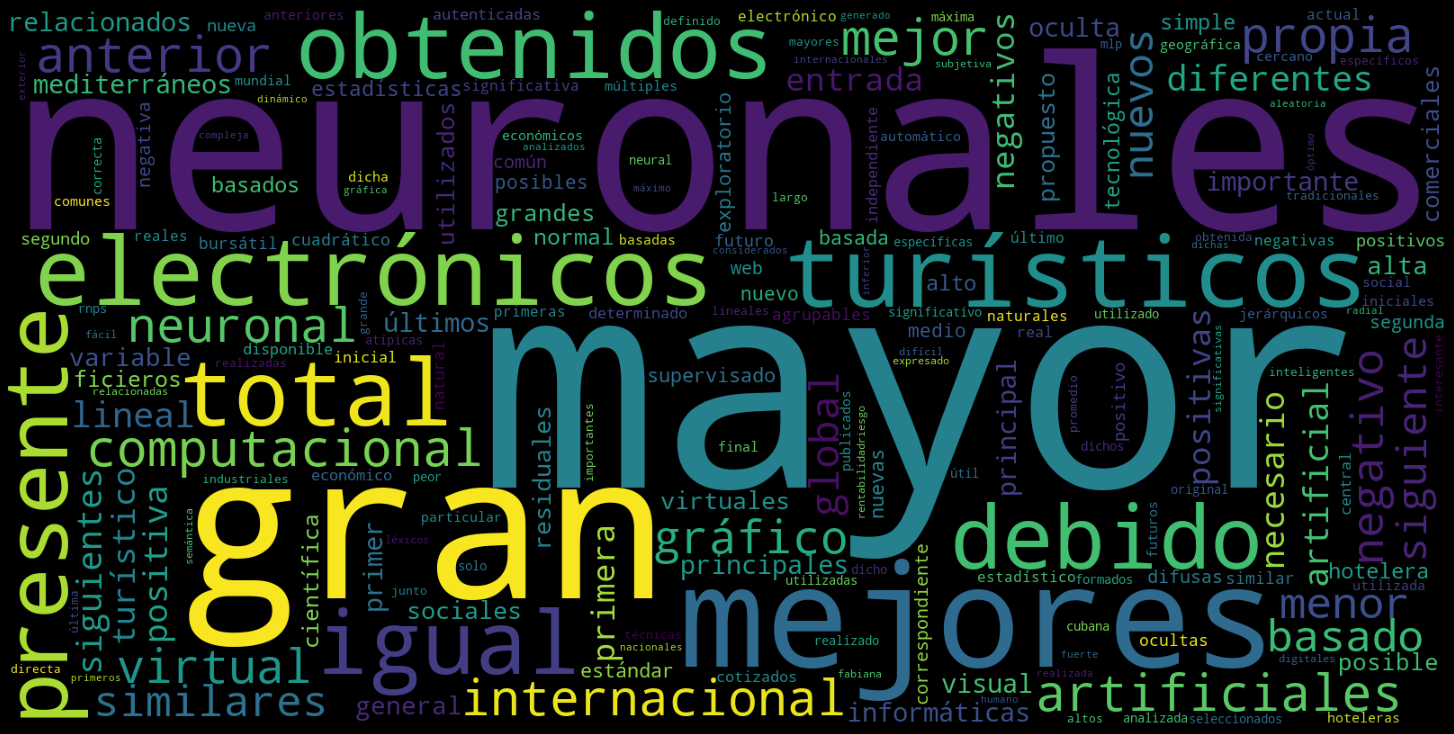

In [39]:
print('Adjetivos')
nube = WordCloud()
wordcloud1 = WordCloud(width=1600, height=800).generate_from_frequencies(frequencies=coleccion3)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

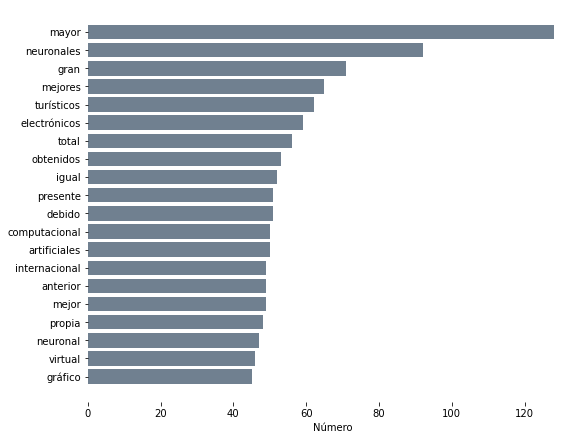

In [40]:
top20 = pd.Series(' '.join(df1['Adjetivos']).lower().split()).value_counts()[:20]
fig = plt.figure(figsize=(8, 6),constrained_layout=True)
#plt.title('Top 20 Palabras más usadas',fontsize=15,fontweight='bold')
plt.barh(top20.index,top20, color = 'slategray')
plt.gca().invert_yaxis()
plt.xlabel('Número')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show() 

Adverbios


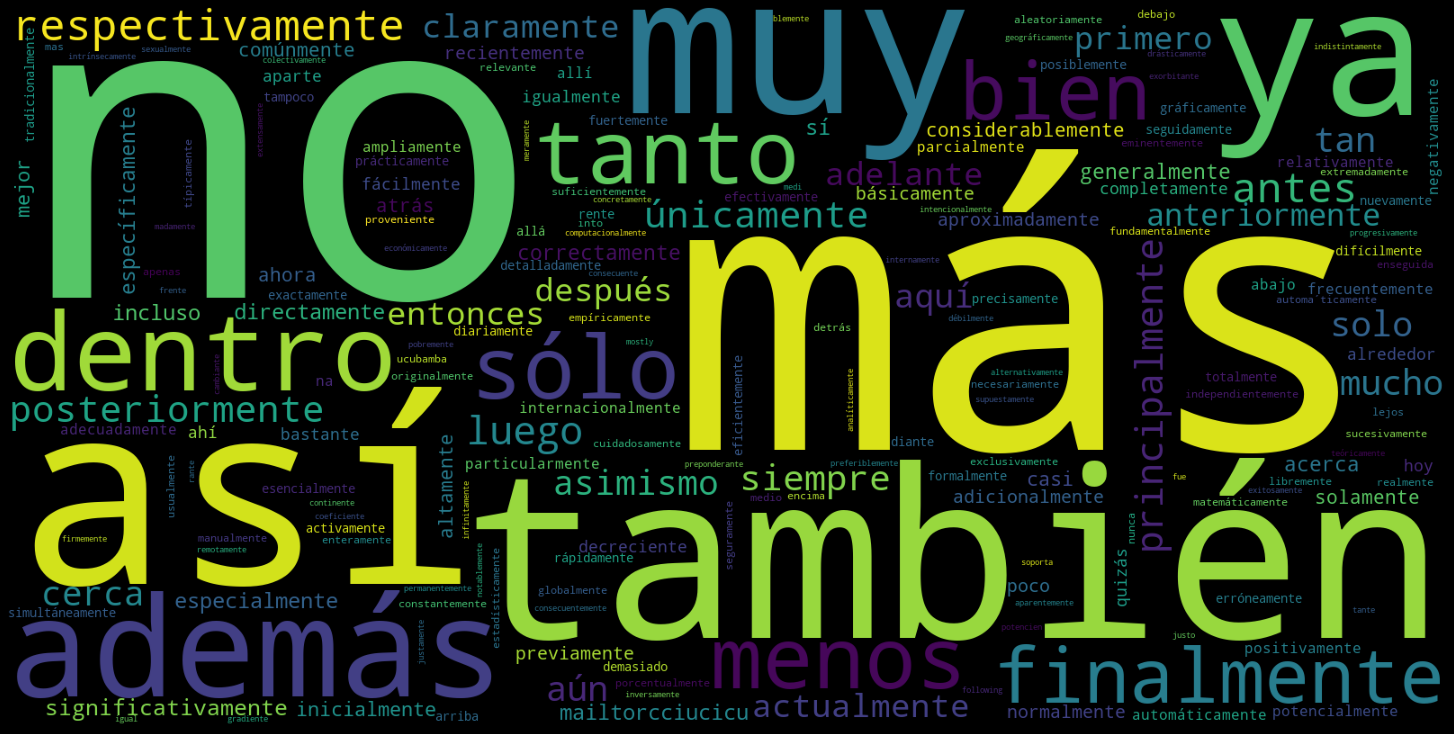

In [41]:
print('Adverbios')
nube = WordCloud()
wordcloud1 = WordCloud(width=1600, height=800).generate_from_frequencies(frequencies=coleccion4)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

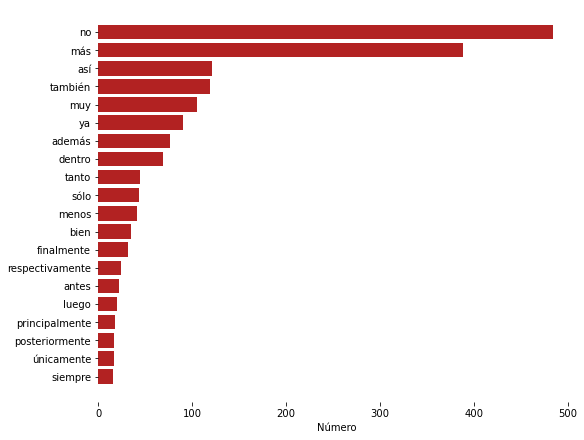

In [42]:
top20 = pd.Series(' '.join(df1['Adverbios']).lower().split()).value_counts()[:20]
fig = plt.figure(figsize=(8, 6),constrained_layout=True)
#plt.title('Top 20 Palabras más usadas',fontsize=15,fontweight='bold')
plt.barh(top20.index,top20, color = 'firebrick')
plt.gca().invert_yaxis()
plt.xlabel('Número')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show() 

# Modelado

## Preprocesamiento

In [43]:
#Importamos stopwords
from nltk.corpus import stopwords
stop = stopwords.words("spanish")

In [44]:
#Limpiar texto
def limpiar_texto (text):
    if text is None:
        return ''
    text = text.replace('\\n', " ")
    text = text.replace('\\t', " ")
    text = str(text).replace("nan",'').lower() #"Hacer las palabras en minusculas"
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) #Remover signos de puntuación
    text = re.sub('“', '',text) #Remover comillas dobles
    text = re.sub(r'\w*\d\w*', '', text) #Remover palabras que contengan numeros
    return ' '.join(word for word in text.split() if word not in stop)

In [45]:
# Remover palabras de 1 a 3 letras, salvo excepciones (items)
#Ayuda a remover errores al procesar y stopwords en ingles

#items1 = ['y','a','o','u','q','d']

#Conservar para corregir o se quedan porque existe la palabra largo =2
items2 = ['si','oh','él','iv','mo','ma','yo','ej','dr']

#Conservar para corregir o se quedan porque existe la palabra largo = 3
items3 = ['tal','dos','red','par','vez','ser','aún','fin','ver','dar','ahí','uso','año','pam',
          'key','mar','pie','día','set','min','bio','río','mes','uno','rna','ann','ojo','mlp','rbf','eje','tic',
          'web','dan','mas','tos','pro','erp','crm','vía','hoy','usd','mil','mse','lce','tba','pos','sal','mae',
          'pln','liu','svm','sol','wom','svs','fcm','rpm','pan','roe','roa','smv']

def remover_cortos(text):
    sent =[]
    text = text.split(" ")
    doc = list(text)
    for word in doc:
        if len(word) > 3:
            sent.append(word)     
        elif (len(word)==2 and word in items2):
            sent.append(word)
        elif (len(word)==3 and word in items3):
            sent.append(word)    
    return  " ".join(sent)

In [46]:
df['Texto_Limpio'] = df['Texto'].apply(lambda x: limpiar_texto(x))
df['Texto_Limpio'] = df['Texto_Limpio'].apply(lambda x: remover_cortos(x))

In [47]:
df.head()

Titulos  \
0  Paper Argentina Analisis Numerico de diferente...   
1  Paper Bolivia Clustering, mediterraneidad y co...   
2  Paper Colombia Analisis Cluster como tecnica e...   
3  Paper Colombia Aplicación de Redes Neuronales ...   
4  Paper Colombia Clusters como un modelo en el d...   

                                               Texto  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                        Texto_Limpio  
0  resumen presente trabajo analizan diferentes m...  
1  resumen tema mediterraneidad generado bastante...  
2  resumen presenta estudio aplicación análisis c...  
3  resumen trabajo presenta creación dos entornos...  
4  presente artículo finalidad establecer potenci...

#### Lematización

In [48]:
import stanza
stanza.download('es', package='ancora', processors='tokenize,mwt,pos,lemma', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,mwt,pos,lemma', lang='es', use_gpu=True)

2021-12-15 20:48:22 INFO: Downloading these customized packages for language: es (Spanish)...
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| pretrain  | ancora  |

2021-12-15 20:48:22 INFO: File exists: C:\Users\Dell\stanza_resources\es\tokenize\ancora.pt.
2021-12-15 20:48:22 INFO: File exists: C:\Users\Dell\stanza_resources\es\mwt\ancora.pt.
2021-12-15 20:48:23 INFO: File exists: C:\Users\Dell\stanza_resources\es\pos\ancora.pt.
2021-12-15 20:48:23 INFO: File exists: C:\Users\Dell\stanza_resources\es\lemma\ancora.pt.
2021-12-15 20:48:24 INFO: File exists: C:\Users\Dell\stanza_resources\es\pretrain\ancora.pt.
2021-12-15 20:48:24 INFO: Finished downloading models and saved to C:\Users\Dell\stanza_resources.
2021-12-15 20:48:24 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | a

#### Creación de la función (2 opciones)

In [49]:
def lemmatizer(text):
    sent =[]
    text = text.split(" ")
    doc = list(text)
    for word in doc:
        sent.append(stNLP(word).sentences[0].words[0].lemma)
    return  " ".join(sent)

#import es_core_news_sm #función en español de spacy
#nlp = es_core_news_sm.load()

#def lemmatizer(text):        
#    sent = []
#    doc = nlp(text)
#    for word in doc:
#        sent.append(word.lemma_)
#    return " ".join(sent)

In [50]:
%%time
#Demora bastante usando stannza (20 papers = 25 minutos aprox)
df['Texto_Lematizado'] = df['Texto_Limpio'].apply(lambda x: lemmatizer(x))

C:\Users\Dell\anaconda3\lib\site-packages\stanza\models\common\beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords


Wall time: 27min 19s


In [51]:
df.head()

Titulos  \
0  Paper Argentina Analisis Numerico de diferente...   
1  Paper Bolivia Clustering, mediterraneidad y co...   
2  Paper Colombia Analisis Cluster como tecnica e...   
3  Paper Colombia Aplicación de Redes Neuronales ...   
4  Paper Colombia Clusters como un modelo en el d...   

                                               Texto  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                        Texto_Limpio  \
0  resumen presente trabajo analizan diferentes m...   
1  resumen tema mediterraneidad generado bastante...   
2  resumen presenta estudio aplicación análisis c...   
3  resumen trabajo presenta creación dos entornos...   
4  presente artículo finalidad establecer potenci...   

                                    Texto_Lematizado  
0  resumen presente trabajo analizar diferente me...  
1  resumen tema mediterraneidad generado bastante...  
2  resumen presentar estudio aplicación análisis ...  
3  resumen trabajo presentar creación dos entor v...  
4  presente artículo finalidad establecer potenci...

#### Stematización

In [52]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("spanish")

In [53]:
def stem_palabras(text):        
    sent = []
    text = text.split()
    for word in text:
        sent.append(stemmer.stem(word))
    return " ".join(sent)

In [54]:
%%time
df['Texto_Stematizado'] = df['Texto_Limpio'].apply(lambda x: stem_palabras(x))

Wall time: 1.73 s


In [55]:
df.head()

Titulos  \
0  Paper Argentina Analisis Numerico de diferente...   
1  Paper Bolivia Clustering, mediterraneidad y co...   
2  Paper Colombia Analisis Cluster como tecnica e...   
3  Paper Colombia Aplicación de Redes Neuronales ...   
4  Paper Colombia Clusters como un modelo en el d...   

                                               Texto  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   
3  resumen en este trabajo se presenta la creació...   
4  r e s u m e n el presente artículo tiene como ...   

                                        Texto_Limpio  \
0  resumen presente trabajo analizan diferentes m...   
1  resumen tema mediterraneidad generado bastante...   
2  resumen presenta estudio aplicación análisis c...   
3  resumen trabajo presenta creación dos entornos...   
4  presente artículo finalidad establecer potenci...   

                                    Texto_Lematizado  \
0  resumen presente trabajo analizar diferente me...   
1  resumen tema mediterraneidad generado bastante...   
2  resumen presentar estudio aplicación análisis ...   
3  resumen trabajo presentar creación dos entor v...   
4  presente artículo finalidad establecer potenci...   

                                   Texto_Stematizado  
0  resum present trabaj analiz diferent metodolog...  
1  resum tem mediterran gener bastant interes deb...  
2  resum present estudi aplic analisis clust meto...  
3  resum trabaj present creacion dos entorn virtu...  
4  present articul final establec potencial impli...

#### Número de palabras por tipo de limpieza

In [56]:
coleccion1 = ""
coleccion2 = ""
coleccion3 = ""
coleccion4 = ""

coleccion1 = Counter()
df['Texto'].str.lower().str.split().apply(coleccion1.update)
coleccion2 = Counter()
df['Texto_Limpio'].str.lower().str.split().apply(coleccion2.update)
coleccion3 = Counter()
df['Texto_Lematizado'].str.lower().str.split().apply(coleccion3.update)
coleccion4 = Counter()
df['Texto_Stematizado'].str.lower().str.split().apply(coleccion4.update)
print('finalizado')

finalizado


In [57]:
tipo= ['Total','Limpio','Lematizado','Stematizado']
total_palabra = [sum(coleccion1.values()),sum(coleccion2.values()),sum(coleccion3.values()),sum(coleccion4.values())]
unicas = [len(coleccion1),len(coleccion2),len(coleccion3),len(coleccion4)]
resumen = pd.DataFrame([tipo,total_palabra,unicas], index = ['Tipo','Nro_Total','Nro_Unicas']).T
resumen

Tipo Nro_Total Nro_Unicas
0        Total    113057      18365
1       Limpio     55071      10546
2   Lematizado     55071       7396
3  Stematizado     55071       6387

### Número de palabras por texto

In [58]:
#Usando Collections para el numero de palabras 
df['Numero_Palabras_texto'] = df.Texto.apply(lambda x: len(x.split()))
df['Numero_Palabras_limpio'] = df.Texto_Limpio.apply(lambda x: len(x.split()))
df['Numero_Palabras_lematizado'] = df.Texto_Lematizado.apply(lambda x: len(x.split()))
df['Numero_Palabras_stemming'] = df.Texto_Stematizado.apply(lambda x: len(x.split()))

In [59]:
%%time
df['Numero_Unicas_texto'] = df['Texto'].apply(lambda x: len(set(x.split())))
df['Numero_Unicas_limpio'] = df['Texto_Limpio'].apply(lambda x: len(set(x.split())))
df['Numero_Unicas_lematizado'] = df['Texto_Lematizado'].apply(lambda x: len(set(x.split())))
df['Numero_Unicas_stemming'] = df['Texto_Stematizado'].apply(lambda x: len(set(x.split())))

Wall time: 55 ms


In [60]:
df.head(3)

Titulos  \
0  Paper Argentina Analisis Numerico de diferente...   
1  Paper Bolivia Clustering, mediterraneidad y co...   
2  Paper Colombia Analisis Cluster como tecnica e...   

                                               Texto  \
0  resumen. en el presente trabajo se analizan di...   
1  resumen el tema de la mediterraneidad ha gener...   
2  resumen se presenta con este estudio la aplica...   

                                        Texto_Limpio  \
0  resumen presente trabajo analizan diferentes m...   
1  resumen tema mediterraneidad generado bastante...   
2  resumen presenta estudio aplicación análisis c...   

                                    Texto_Lematizado  \
0  resumen presente trabajo analizar diferente me...   
1  resumen tema mediterraneidad generado bastante...   
2  resumen presentar estudio aplicación análisis ...   

                                   Texto_Stematizado  Numero_Palabras_texto  \
0  resum present trabaj analiz diferent metodolog...                   6837   
1  resum tem mediterran gener bastant interes deb...                   7623   
2  resum present estudi aplic analisis clust meto...                   4356   

   Numero_Palabras_limpio  Numero_Palabras_lematizado  \
0                    3414                        3414   
1                    3620                        3620   
2                    2199                        2199   

   Numero_Palabras_stemming  Numero_Unicas_texto  Numero_Unicas_limpio  \
0                      3414                 1985                  1346   
1                      3620                 2208                  1301   
2                      2199                 1432                   994   

   Numero_Unicas_lematizado  Numero_Unicas_stemming  
0                      1028                     924  
1                      1041                     920  
2                       795                     719

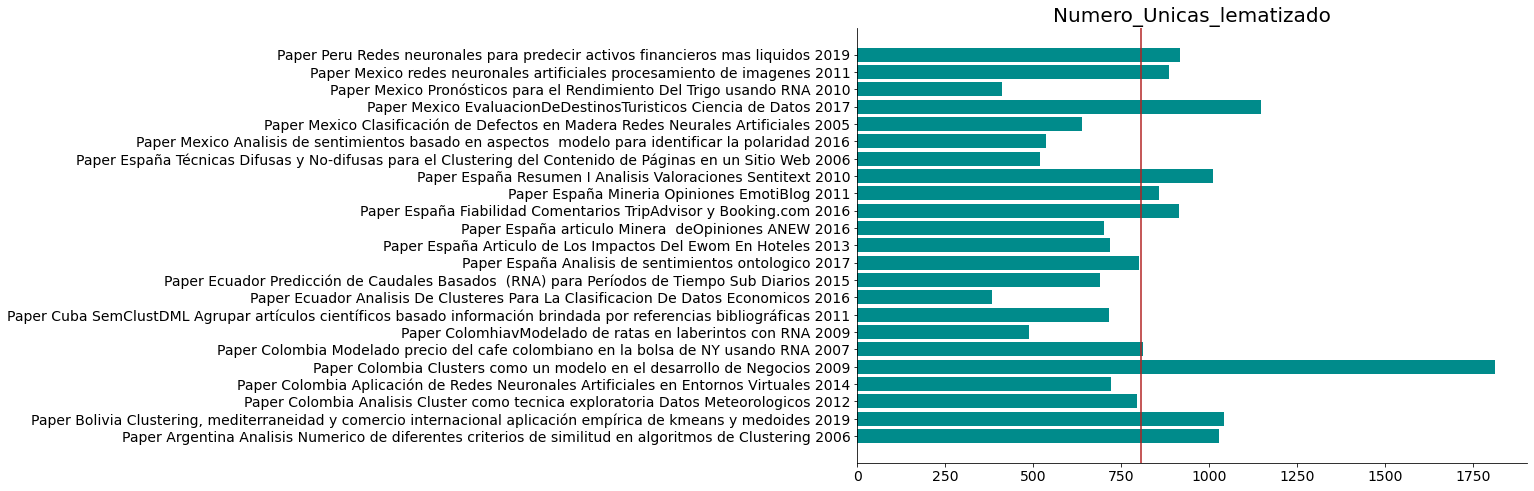

In [61]:
plt.figure(figsize=(12,8))
ax = plt.subplot(111)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.barh(df1['Titulos'],df['Numero_Unicas_lematizado'],color = 'darkcyan')
plt.title('Numero_Unicas_lematizado',fontsize=20 )
plt.axvline(x=df['Numero_Unicas_lematizado'].mean(), color = 'firebrick')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

#### Frecuencia de palabras

In [62]:
from collections import Counter
coleccion1 = ""
coleccion1 = Counter()
df['Texto_Lematizado'].str.split().apply(coleccion1.update)
df_lema = pd.DataFrame.from_dict(coleccion1, orient='index').reset_index()
df_lema.rename(columns={ df_lema.columns[1]: "Cantidad" , df_lema.columns[0]: "Palabra" }, inplace = True)
df_lema.sort_values('Cantidad', ascending = False).head(10)

Palabra  Cantidad
356  resultado       386
10        dato       378
93         red       368
229      poder       365
74      modelo       303
125    cluster       276
171  algoritmo       260
8     análisis       258
66        cada       252
313        ser       235

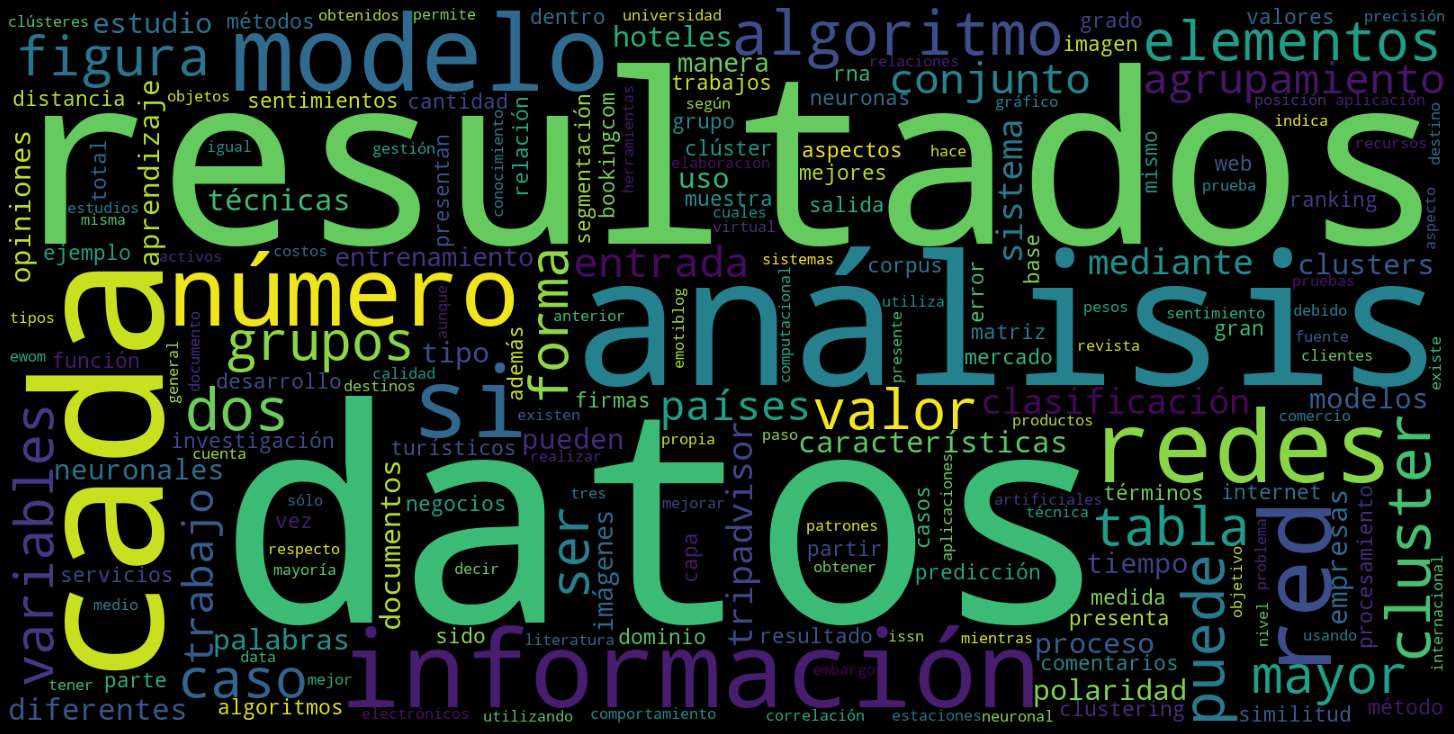

In [63]:
#Total
coleccion1 = ""
coleccion1 = Counter()
df['Texto_Limpio'].str.lower().str.split().apply(coleccion1.update)

nube = WordCloud()
wordcloud1 = WordCloud(width=1600, height=800).generate_from_frequencies(frequencies=coleccion1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

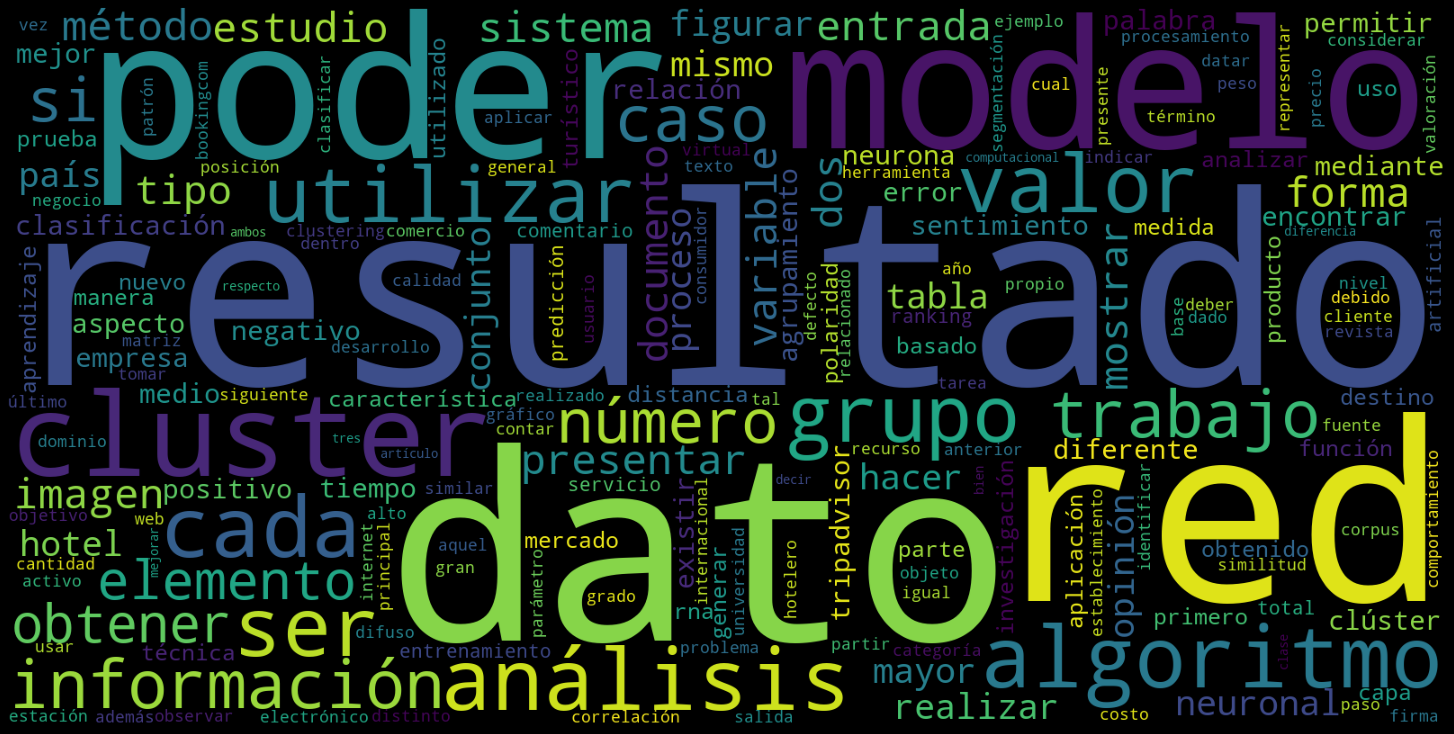

In [64]:
#Lematizado
coleccion1 = ""
coleccion1 = Counter()
df['Texto_Lematizado'].str.lower().str.split().apply(coleccion1.update)

nube = WordCloud()
wordcloud1 = WordCloud(width=1600, height=800).generate_from_frequencies(frequencies=coleccion1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### TF - IDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [66]:
##calcular TF-IDF
vectores=TfidfVectorizer()

In [67]:
tfs=vectores.fit_transform(df['Texto_Lematizado'])
##guardar los nombres
nombres=vectores.get_feature_names()
#convertir la matriz a densa, luego lista, luego dataframe y trasponerla
matriz=tfs.todense()
matlist=matriz.tolist()
finalm=pd.DataFrame(matlist,columns=nombres)
final2=finalm.transpose()
final2.head(10)

0         1    2    3         4    5         6    7   \
abajo           0.01339  0.005085  0.0  0.0  0.000000  0.0  0.000000  0.0   
abandonar       0.00000  0.000000  0.0  0.0  0.000000  0.0  0.017167  0.0   
abarcar         0.00000  0.000000  0.0  0.0  0.004554  0.0  0.000000  0.0   
abaste          0.00000  0.000000  0.0  0.0  0.005685  0.0  0.000000  0.0   
abastecer       0.00000  0.000000  0.0  0.0  0.005685  0.0  0.000000  0.0   
abastecimiento  0.00000  0.000000  0.0  0.0  0.017055  0.0  0.000000  0.0   
abceseboler     0.00000  0.006348  0.0  0.0  0.000000  0.0  0.000000  0.0   
abdou           0.00000  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
abier           0.00000  0.000000  0.0  0.0  0.000000  0.0  0.051501  0.0   
abierto         0.00000  0.005085  0.0  0.0  0.000000  0.0  0.082514  0.0   

                    8    9   ...   13        14        15   16   17   18   19  \
abajo           0.0000  0.0  ...  0.0  0.000000  0.009268  0.0  0.0  0.0  0.0   
abandonar       0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abarcar         0.0000  0.0  ...  0.0  0.007737  0.000000  0.0  0.0  0.0  0.0   
abaste          0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abastecer       0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abastecimiento  0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abceseboler     0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abdou           0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abier           0.0000  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
abierto         0.0162  0.0  ...  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0   

                 20   21       22  
abajo           0.0  0.0  0.00000  
abandonar       0.0  0.0  0.00000  
abarcar         0.0  0.0  0.00000  
abaste          0.0  0.0  0.00000  
abastecer       0.0  0.0  0.00000  
abastecimiento  0.0  0.0  0.00000  
abceseboler     0.0  0.0  0.00000  
abdou           0.0  0.0  0.01047  
abier           0.0  0.0  0.00000  
abierto         0.0  0.0  0.00000  

[10 rows x 23 columns]

In [68]:
tf_idf_total = pd.DataFrame(final2.sum(axis=1))

In [150]:
tf_idf_total.tail(11)

0     palabra
ρρρρ        0.009879        ρρρρ
𝐶𝐴𝐶         0.025663         𝐶𝐴𝐶
𝐶𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑𝑒  0.008554  𝐶𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑𝑒
𝐶𝑖          0.008554          𝐶𝑖
𝐸𝐴𝐶         0.008554         𝐸𝐴𝐶
𝐸𝐴𝐶𝐶        0.017109        𝐸𝐴𝐶𝐶
𝐸𝑙𝑒𝑚        0.025663        𝐸𝑙𝑒𝑚
𝑆𝑖          0.008554          𝑆𝑖
𝑐𝑎𝑝𝑐𝑔       0.017109       𝑐𝑎𝑝𝑐𝑔
𝑙𝑜𝑔𝑘        0.025663        𝑙𝑜𝑔𝑘
𝑚𝑎𝑡𝑟𝑖𝑧𝑜𝑖𝑐   0.025663   𝑚𝑎𝑡𝑟𝑖𝑧𝑜𝑖𝑐

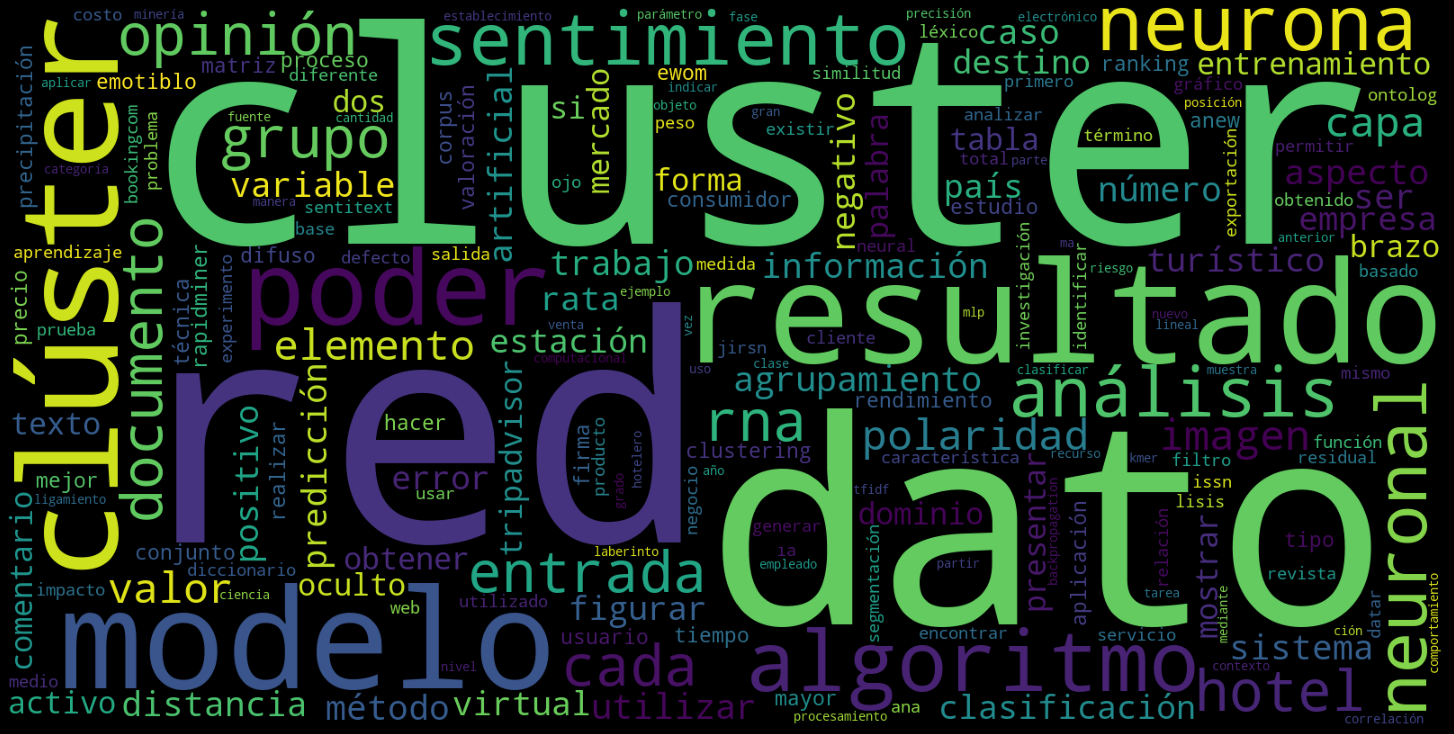

In [70]:
tf_idf_total["palabra"]=tf_idf_total.index

##Wordcloud con las palabras del tf-idf
diccio={}
for freq,name in tf_idf_total.values:
    diccio[name]=freq



wordcloud = WordCloud(width=1600, height=800)
wordcloud.generate_from_frequencies(frequencies=diccio)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [71]:
%%time
os.chdir("D:/Maestria Ciencia de Datos/IV Semestre/Analisis de Texto")
df.to_csv('df.csv',index=False)

Wall time: 338 ms


In [72]:
#df_lema.to_excel('revisar.xlsx')

## Aprendizaje No Supervisado

## En base a frecuencias

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics.pairwise import cosine_similarity
scaler = MaxAbsScaler()

In [74]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Texto_Lematizado'])

X = X[:,:-10]

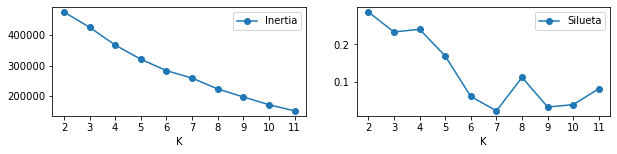

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

results = dict()
k_cand = list(range(2,12))

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score0 = kmeans.inertia_
    score1 = silhouette_score(X,kmeans.labels_)
    results[k] = {'k':kmeans,'s0':score0,'s1':score1}

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,2))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Silueta')

for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

In [76]:
from kneed import  KneeLocator #Punto de inflexion

inercia = [i['s0'] for i in results.values()]
kl = KneeLocator(range(2,12), inercia, curve="convex", direction="decreasing")
kl.elbow

6

In [77]:
# Por silueta
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=0)
model.fit(X)
labels=model.labels_

In [78]:
sample_silhouette_values = silhouette_samples(X, labels)

means_lst = []
for label in range(true_k):
    means_lst.append(sample_silhouette_values[labels == label].mean())
means_lst    

[0.0, 0.27599342365682716, 0.0, 0.0]

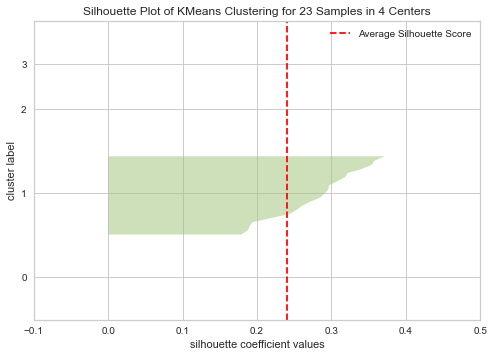

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 23 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=200, n_clusters=4,
                                      random_state=0))

In [79]:
#!pip install yellowbrick
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=0), X, colors='yellowbrick')    

In [80]:
# Por Codo
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=0)
model.fit(X)
labels=model.labels_

In [81]:
sample_silhouette_values = silhouette_samples(X, labels)

means_lst = []
for label in range(true_k):
    means_lst.append(sample_silhouette_values[labels == label].mean())
means_lst    

[0.0, 0.09756337172553566, 0.0, 0.0, 0.05115396157362967, 0.025831367712910735]

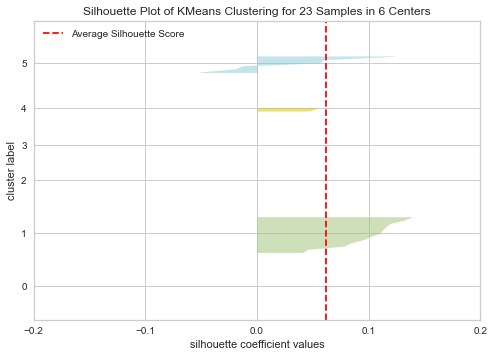

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 23 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=200, n_clusters=6,
                                      random_state=0))

In [82]:
#!pip install yellowbrick
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10, random_state=0), X, colors='yellowbrick')    

In [83]:
df['Cluster_TF'] = labels

In [84]:
df.groupby('Cluster_TF').size()

Cluster_TF
0     1
1    12
2     1
3     1
4     2
5     6
dtype: int64

In [85]:
pd.options.display.max_colwidth = 120
df[['Cluster_TF','Titulos']].sort_values(by=['Cluster_TF'])

Cluster_TF  \
13           0   
11           1   
19           1   
17           1   
16           1   
15           1   
14           1   
12           1   
10           1   
22           1   
8            1   
6            1   
2            1   
1            2   
4            3   
7            4   
0            4   
21           5   
5            5   
3            5   
18           5   
20           5   
9            5   

                                                                                                                 Titulos  
13                                                    Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016  
11                                                        Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013  
19                                                     Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017  
17                   Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016  
16           Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006  
15                                                           Paper España Resumen I Analisis Valoraciones Sentitext 2010  
14                                                                         Paper España Mineria Opiniones EmotiBlog 2011  
12                                                                   Paper España articulo Minera  deOpiniones ANEW 2016  
10                                                                 Paper España Analisis de sentimientos ontologico 2017  
22                                       Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019  
8                                     Paper Ecuador Analisis De Clusteres Para La Clasificacion De Datos Economicos 2016  
6                                                            Paper ColomhiavModelado de ratas en laberintos con RNA 2009  
2                                    Paper Colombia Analisis Cluster como tecnica exploratoria Datos Meteorologicos 2012  
1       Paper Bolivia Clustering, mediterraneidad y comercio internacional aplicación empírica de kmeans y medoides 2019  
4                                               Paper Colombia Clusters como un modelo en el desarrollo de Negocios 2009  
7   Paper Cuba SemClustDML Agrupar artículos científicos basado información brindada por referencias bibliográficas 2011  
0                Paper Argentina Analisis Numerico de diferentes criterios de similitud en algoritmos de Clustering 2006  
21                                             Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011  
5                                   Paper Colombia Modelado precio del cafe colombiano en la bolsa de NY usando RNA 2007  
3                                  Paper Colombia Aplicación de Redes Neuronales Artificiales en Entornos Virtuales 2014  
18                                     Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005  
20                                                Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010  
9                           Paper Ecuador Predicción de Caudales Basados  (RNA) para Períodos de Tiempo Sub Diarios 2015

###  En base a TF - IDF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Texto_Lematizado'])
X = X[:,:-10]

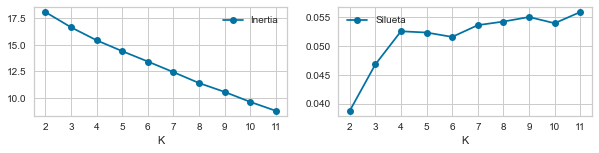

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

results = dict()
k_cand = list(range(2,12))

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score0 = kmeans.inertia_
    score1 = silhouette_score(X,kmeans.labels_)
    results[k] = {'k':kmeans,'s0':score0,'s1':score1}

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,2))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Silueta')

for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

In [88]:
from kneed import  KneeLocator #Punto de inflexion

inercia = [i['s0'] for i in results.values()]
kl = KneeLocator(range(2,12), inercia, curve="convex", direction="decreasing")
kl.elbow

C:\Users\Dell\anaconda3\lib\site-packages\kneed\knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [89]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=0)
model.fit(X)
labels=model.labels_

In [90]:
sample_silhouette_values = silhouette_samples(X, labels)

means_lst = []
for label in range(true_k):
    means_lst.append(sample_silhouette_values[model.labels_ == label].mean())
means_lst    

[0.022351970216361372,
 0.055316097010034294,
 0.025977034135894955,
 0.07206055693316457,
 0.08952659029113386,
 0.16097503434075505,
 0.0,
 0.0,
 0.0]

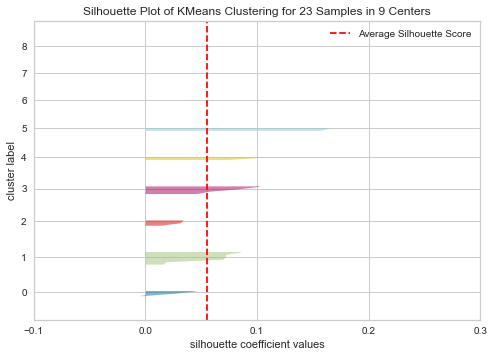

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 23 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=9, random_state=0))

In [91]:
#!pip install yellowbrick
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(true_k, random_state=0), X, colors='yellowbrick')   

In [92]:
# Mejor de menos grupos
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=0)
model.fit(X)
labels=model.labels_

In [93]:
sample_silhouette_values = silhouette_samples(X, labels)

means_lst = []
for label in range(true_k):
    means_lst.append(sample_silhouette_values[model.labels_ == label].mean())
means_lst    

[0.02294774153027386,
 0.05108588493353797,
 0.050380417425224346,
 0.0812837543296001]

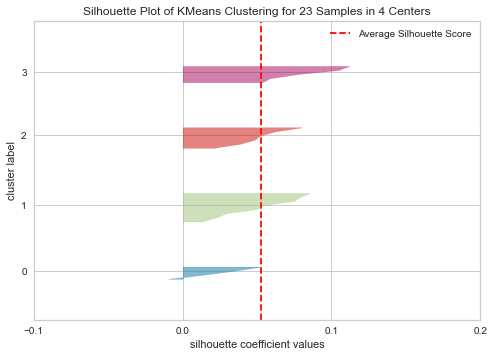

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 23 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=200, n_clusters=4,
                                      random_state=0))

In [94]:
#!pip install yellowbrick
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=0), X, colors='yellowbrick')   

In [95]:
df['Cluster'] = labels

In [96]:
df.groupby('Cluster').size()

Cluster
0    4
1    8
2    6
3    5
dtype: int64

In [97]:
pd.options.display.max_colwidth = 120
df[['Cluster','Titulos']].sort_values(by=['Cluster'])

Cluster  \
11        0   
19        0   
4         0   
13        0   
20        1   
18        1   
21        1   
9         1   
22        1   
6         1   
5         1   
3         1   
7         2   
16        2   
2         2   
1         2   
8         2   
0         2   
10        3   
12        3   
14        3   
15        3   
17        3   

                                                                                                                 Titulos  
11                                                        Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013  
19                                                     Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017  
4                                               Paper Colombia Clusters como un modelo en el desarrollo de Negocios 2009  
13                                                    Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016  
20                                                Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010  
18                                     Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005  
21                                             Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011  
9                           Paper Ecuador Predicción de Caudales Basados  (RNA) para Períodos de Tiempo Sub Diarios 2015  
22                                       Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019  
6                                                            Paper ColomhiavModelado de ratas en laberintos con RNA 2009  
5                                   Paper Colombia Modelado precio del cafe colombiano en la bolsa de NY usando RNA 2007  
3                                  Paper Colombia Aplicación de Redes Neuronales Artificiales en Entornos Virtuales 2014  
7   Paper Cuba SemClustDML Agrupar artículos científicos basado información brindada por referencias bibliográficas 2011  
16           Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006  
2                                    Paper Colombia Analisis Cluster como tecnica exploratoria Datos Meteorologicos 2012  
1       Paper Bolivia Clustering, mediterraneidad y comercio internacional aplicación empírica de kmeans y medoides 2019  
8                                     Paper Ecuador Analisis De Clusteres Para La Clasificacion De Datos Economicos 2016  
0                Paper Argentina Analisis Numerico de diferentes criterios de similitud en algoritmos de Clustering 2006  
10                                                                 Paper España Analisis de sentimientos ontologico 2017  
12                                                                   Paper España articulo Minera  deOpiniones ANEW 2016  
14                                                                         Paper España Mineria Opiniones EmotiBlog 2011  
15                                                           Paper España Resumen I Analisis Valoraciones Sentitext 2010  
17                   Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016

## En base a word embedings

In [98]:
from gensim.models import Word2Vec
import nltk
def tokenize(text):
    words = nltk.word_tokenize(text, "spanish")
    return [word for word in words if word.isalnum()]

sent = (df['Texto_Lematizado'].apply(tokenize)).tolist()
model = Word2Vec(sent,min_count=5, #minimo número de ocurrencias para ser incluidas en el modelo
                     window=35, # La maxima distancia entre la ocurrencia y la palabra predicha en una oración 
                     size=50, #La dimensionalidad de los vectores
                )

In [99]:
#preparar la data al formato para el word embedding
final_data = []
for i, row in df.iterrows():
    vectorized = []
    doc = row['Texto_Lematizado']
    all_words = doc.split(sep=" ")
    for w in all_words:
        try:
            vectorized.append(list(model[w]))
        except Exception as e:
            pass
    try:
        vectorized = np.asarray(vectorized)
        vectorized_mean = list(np.mean(vectorized, axis=0))
    except Exception as e:
        vectorized_mean = list(np.zeros(100))
        pass
    try:
        len(vectorized_mean)
    except:
        vectorized_mean = list(np.zeros(100))
    temp_row = np.asarray(vectorized_mean)
    final_data.append(temp_row)
X = np.asarray(final_data)
print('Conversion to array complete') 


C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Conversion to array complete


In [100]:
X

array([[ 0.46185523,  0.18876533,  0.287444  , ...,  0.30088753,
         0.3163326 , -0.5060244 ],
       [ 0.43632942,  0.24799104,  0.29704636, ...,  0.2927391 ,
         0.29674837, -0.54934216],
       [ 0.48297632,  0.20976868,  0.29840043, ...,  0.31506214,
         0.3370845 , -0.5406364 ],
       ...,
       [ 0.45510975,  0.16690692,  0.26696843, ...,  0.29401815,
         0.2451149 , -0.4773016 ],
       [ 0.44515002,  0.20419921,  0.289328  , ...,  0.31171864,
         0.25807613, -0.51239985],
       [ 0.4175235 ,  0.21958923,  0.28324002, ...,  0.28537774,
         0.2776203 , -0.49567524]], dtype=float32)

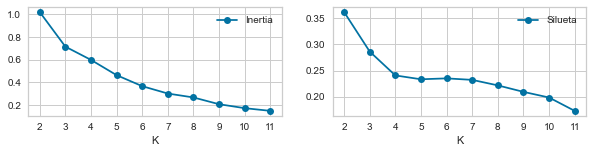

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

results = dict()
k_cand = list(range(2,12))

for k in k_cand:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score0 = kmeans.inertia_
    score1 = silhouette_score(X,kmeans.labels_)
    results[k] = {'k':kmeans,'s0':score0,'s1':score1}

fig,axs = plt.subplots(1,2,sharex=True,figsize=(10,2))
axs[0].plot([i for i in results.keys()],[i['s0'] for i in results.values()],'o-',label='Inertia')
axs[1].plot([i for i in results.keys()],[i['s1'] for i in results.values()],'o-',label='Silueta')

for ax in axs:
    ax.set_xticks(k_cand)
    ax.set_xlabel('K')
    ax.legend()

In [102]:
from kneed import  KneeLocator #Punto de inflexion

inercia = [i['s0'] for i in results.values()]
kl = KneeLocator(range(2,12), inercia, curve="convex", direction="decreasing")
kl.elbow

6

In [103]:
# Mejor de menos grupos
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=0)
model.fit(X)
labels=model.labels_

In [104]:
sample_silhouette_values = silhouette_samples(X, labels)

means_lst = []
for label in range(true_k):
    means_lst.append(sample_silhouette_values[model.labels_ == label].mean())
means_lst    

[0.25027478, 0.43677893, 0.10028967, 0.099318475, 0.26980236, 0.0]

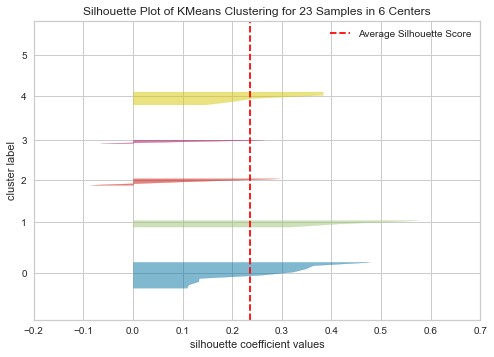

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 23 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=200, n_clusters=6,
                                      random_state=0))

In [105]:
#!pip install yellowbrick
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=0), X, colors='yellowbrick')   

In [106]:
df['Cluster_Embedings'] = labels

In [107]:
df.groupby('Cluster_Embedings').size()

Cluster_Embedings
0    9
1    3
2    3
3    2
4    5
5    1
dtype: int64

In [108]:
pd.options.display.max_colwidth = 120
df[['Cluster_Embedings','Titulos']].sort_values(by=['Cluster_Embedings'])

Cluster_Embedings  \
11                  0   
19                  0   
15                  0   
12                  0   
10                  0   
8                   0   
22                  0   
4                   0   
1                   0   
9                   1   
21                  1   
20                  1   
5                   2   
16                  2   
18                  2   
3                   3   
6                   3   
7                   4   
14                  4   
2                   4   
17                  4   
0                   4   
13                  5   

                                                                                                                 Titulos  
11                                                        Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013  
19                                                     Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017  
15                                                           Paper España Resumen I Analisis Valoraciones Sentitext 2010  
12                                                                   Paper España articulo Minera  deOpiniones ANEW 2016  
10                                                                 Paper España Analisis de sentimientos ontologico 2017  
8                                     Paper Ecuador Analisis De Clusteres Para La Clasificacion De Datos Economicos 2016  
22                                       Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019  
4                                               Paper Colombia Clusters como un modelo en el desarrollo de Negocios 2009  
1       Paper Bolivia Clustering, mediterraneidad y comercio internacional aplicación empírica de kmeans y medoides 2019  
9                           Paper Ecuador Predicción de Caudales Basados  (RNA) para Períodos de Tiempo Sub Diarios 2015  
21                                             Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011  
20                                                Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010  
5                                   Paper Colombia Modelado precio del cafe colombiano en la bolsa de NY usando RNA 2007  
16           Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006  
18                                     Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005  
3                                  Paper Colombia Aplicación de Redes Neuronales Artificiales en Entornos Virtuales 2014  
6                                                            Paper ColomhiavModelado de ratas en laberintos con RNA 2009  
7   Paper Cuba SemClustDML Agrupar artículos científicos basado información brindada por referencias bibliográficas 2011  
14                                                                         Paper España Mineria Opiniones EmotiBlog 2011  
2                                    Paper Colombia Analisis Cluster como tecnica exploratoria Datos Meteorologicos 2012  
17                   Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016  
0                Paper Argentina Analisis Numerico de diferentes criterios de similitud en algoritmos de Clustering 2006  
13                                                    Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016

### Análisis del mejor clustering

In [109]:
# Mejor de mejores grupos, tfidf de 4 grupos
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Texto_Lematizado'])
X = X[:,:-10]

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=0)
model.fit(X)
labels=model.labels_

In [110]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

Top terms per cluster:
Cluster 0:
 destino
 turístico
 hotel
 ewom
 tripadvisor
 firma
 cluster
 ranking
 consumidor
 empresa

Cluster 1:
 red
 neurona
 modelo
 neuronal
 rna
 capa
 entrada
 imagen
 artificial
 rata

Cluster 2:
 clúster
 cluster
 grupo
 documento
 agrupamiento
 distancia
 estación
 dato
 elemento
 país

Cluster 3:
 sentimiento
 polaridad
 opinión
 aspecto
 dominio
 texto
 anew
 emotiblo
 palabra
 corpus



Cluster: 0


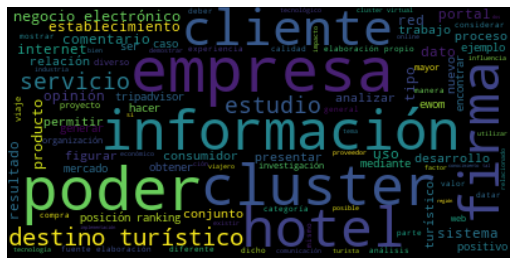

Cluster: 1


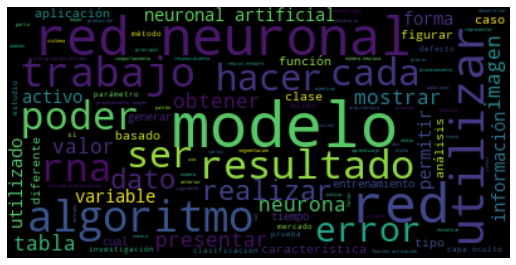

Cluster: 2


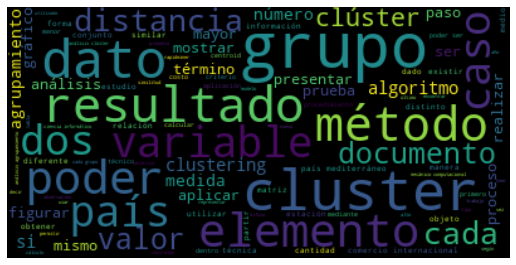

Cluster: 3


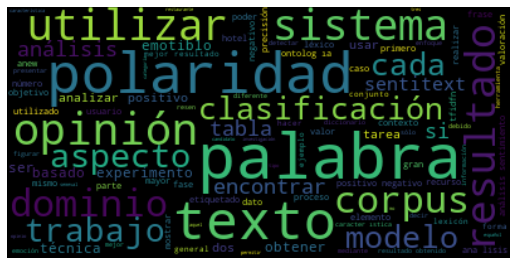

In [111]:
true_k = 4

from wordcloud import WordCloud
result={'cluster':labels,'palabras':df['Texto_Lematizado']}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['palabras'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
    print('Cluster: {}'.format(k)) 
    plt.figure(figsize=(9, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [112]:
# Relaciones entre palabras a traves de un gráfico de redes
import networkx as nx

In [113]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
df['tokenizado'] = df['Texto_Lematizado'].apply(word_tokenize) 
df['bigrams'] = df['tokenizado'].apply(lambda row: list(nltk.ngrams(row, 2)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Gráfico de red

Cluster :  0


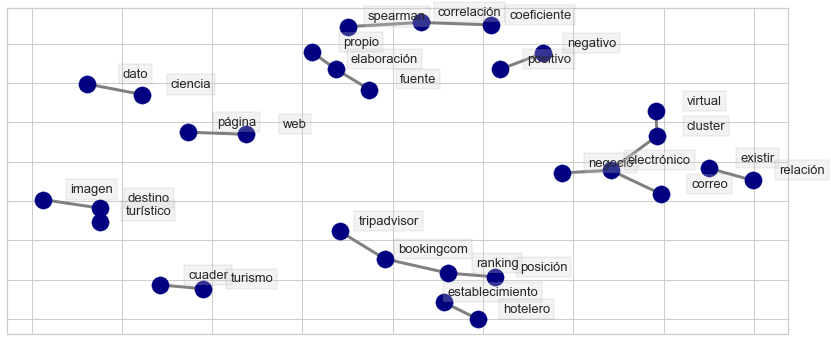

Cluster :  1


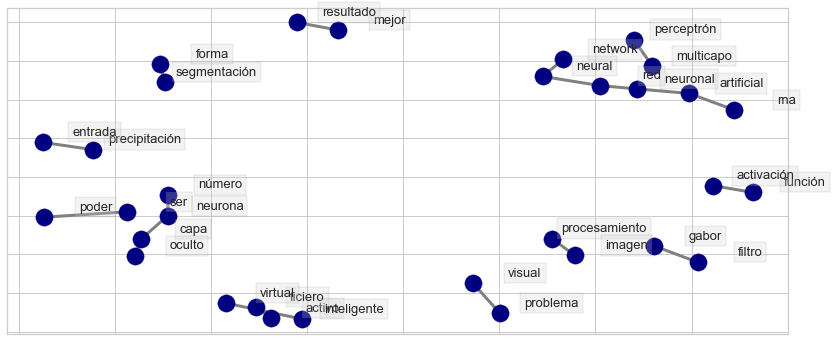

Cluster :  2


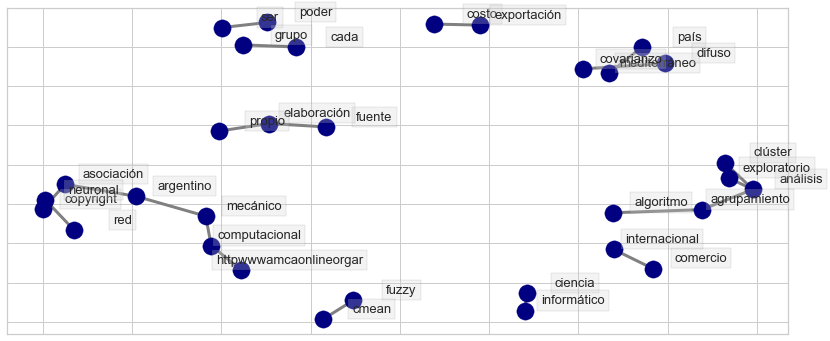

Cluster :  3


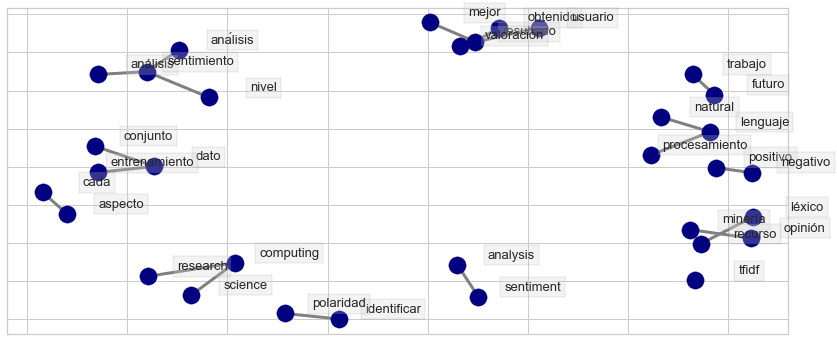

In [114]:
for i in range(4):
    print('Cluster : ',i)
    bigramas_list = [[bigrama for bigrama in lista] for lista in df['bigrams'][(df['Cluster']==i)]]
    bigramas = list(itertools.chain(*bigramas_list))
    bigram_counts = Counter(bigramas)
    bigram_df = pd.DataFrame(bigram_counts.most_common(20),columns=['bigram', 'count'])
    d = bigram_df.set_index('bigram').T.to_dict('records')
    G = nx.Graph()

    # Create connections between nodes
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v * 10))

    fig, ax = plt.subplots(figsize=(14, 6))

    pos = nx.spring_layout(G, k=2)

    # Plot networks
    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='grey',
                     node_color='navy',
                     with_labels = False,
                     ax=ax)

    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='lightgray', alpha=0.25),
                horizontalalignment='center', fontsize=13)

    plt.show()    

## LDA

#### Con la libreria de sklearn

In [115]:
from sklearn.decomposition import LatentDirichletAllocation

In [116]:
paralda = CountVectorizer(min_df=2, max_features=1000)
tflda=paralda.fit_transform(df['Texto_Lematizado'])
nombreslda=paralda.get_feature_names()

In [117]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [118]:
no_top_words = 5
n = 12
lda = LatentDirichletAllocation(n_components=n, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tflda)
id_topico=lda.fit_transform(tflda)
display_topics(lda,nombreslda,no_top_words)

Topic 0:
documento cluster término difuso clustering
Topic 1:
cluster empresa destino turístico negocio
Topic 2:
tripadvisor ranking hotel posición red
Topic 3:
dato resultado poder cada trabajo
Topic 4:
documento resultado término número difuso
Topic 5:
rna virtual problema red dato
Topic 6:
evolutivo predicción productosservicios analizar utilización
Topic 7:
resultado valor aspecto cada elemento
Topic 8:
poder cluster destino valor clúster
Topic 9:
resultado red utilizar algoritmo mercado
Topic 10:
modelo red dato algoritmo poder
Topic 11:
opinión texto análisis palabra valoración


In [119]:
vectores=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000)
tfs=vectores.fit_transform(df['Texto_Lematizado'])

In [120]:
doc_topic = lda.transform(tfs)
doc = []
topic = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    doc.append(n)
    topic.append(topic_most_pr)
df['Topico'] = topic 

In [121]:
topicos_asig = []
for i in topic:
    for x,y in enumerate(lda.components_):
        if i == x:
            topicos_asig.append([" ".join([nombreslda[i] for i in y.argsort()[:-no_top_words - 1:-1]])])
df['Tema'] = topicos_asig                       

In [122]:
#Tema más representativo

In [123]:
pd.options.display.max_colwidth = 120
df[['Cluster','Titulos','Topico','Tema']].sort_values(by=['Cluster'])

Cluster  \
11        0   
19        0   
4         0   
13        0   
20        1   
18        1   
21        1   
9         1   
22        1   
6         1   
5         1   
3         1   
7         2   
16        2   
2         2   
1         2   
8         2   
0         2   
10        3   
12        3   
14        3   
15        3   
17        3   

                                                                                                                 Titulos  \
11                                                        Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013   
19                                                     Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017   
4                                               Paper Colombia Clusters como un modelo en el desarrollo de Negocios 2009   
13                                                    Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016   
20                                                Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010   
18                                     Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005   
21                                             Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011   
9                           Paper Ecuador Predicción de Caudales Basados  (RNA) para Períodos de Tiempo Sub Diarios 2015   
22                                       Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019   
6                                                            Paper ColomhiavModelado de ratas en laberintos con RNA 2009   
5                                   Paper Colombia Modelado precio del cafe colombiano en la bolsa de NY usando RNA 2007   
3                                  Paper Colombia Aplicación de Redes Neuronales Artificiales en Entornos Virtuales 2014   
7   Paper Cuba SemClustDML Agrupar artículos científicos basado información brindada por referencias bibliográficas 2011   
16           Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006   
2                                    Paper Colombia Analisis Cluster como tecnica exploratoria Datos Meteorologicos 2012   
1       Paper Bolivia Clustering, mediterraneidad y comercio internacional aplicación empírica de kmeans y medoides 2019   
8                                     Paper Ecuador Analisis De Clusteres Para La Clasificacion De Datos Economicos 2016   
0                Paper Argentina Analisis Numerico de diferentes criterios de similitud en algoritmos de Clustering 2006   
10                                                                 Paper España Analisis de sentimientos ontologico 2017   
12                                                                   Paper España articulo Minera  deOpiniones ANEW 2016   
14                                                                         Paper España Mineria Opiniones EmotiBlog 2011   
15                                                           Paper España Resumen I Analisis Valoraciones Sentitext 2010   
17                   Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016   

    Topico                                           Tema  
11       1    [cluster empresa destino turístico negocio]  
19       1    [cluster empresa destino turístico negocio]  
4        1    [cluster empresa destino turístico negocio]  
13       2       [tripadvisor ranking hotel posición red]  
20      10              [modelo red dato algoritmo poder]  
18      10              [modelo red dato algoritmo poder]  
21      10              [modelo red dato algoritmo poder]  
9       10              [modelo red dato algoritmo poder]  
22       7        [resultado valor aspecto cada elemento]  
6       10              [modelo red dato algoritmo poder]  
5     

#### Con la libreria de gensim

In [124]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import random
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
df['tokenizado'] = df['Texto_Lematizado'].apply(word_tokenize) 
df['tokenizado'].head()

0    [resumen, presente, trabajo, analizar, diferente, metodología, criterio, realizar, análisis, agrupamiento, dato, mul...
1    [resumen, tema, mediterraneidad, generado, bastante, interés, debate, geopolítico, ser, bolivia, actor, principal, h...
2    [resumen, presentar, estudio, aplicación, análisis, clúster, método, exploratorio, dato, registro, múltiple, informa...
3    [resumen, trabajo, presentar, creación, dos, entor, virtual, inteligente, red, neuronal, artificial, rna, realizar, ...
4    [presente, artículo, finalidad, establecer, potencialidad, implicación, traer, implementación, tecnología, tic, nego...
Name: tokenizado, dtype: object

In [126]:
diccionario = Dictionary(df.tokenizado)
print(f'Número de tokens: {len(diccionario)}')

Número de tokens: 7396


In [127]:
# Creamos el corpus 
corpus = [diccionario.doc2bow(comentario) for comentario in df.tokenizado]

# Mostramos el BOW de documento representado 
# como una lista de tuplas (ID, frecuencia)

In [128]:
%%time
from gensim.models import CoherenceModel
n= 20
temas = []
perplexity = []
coherence = []
for i in range(2,n+1):
    lda = LdaModel(corpus=corpus, id2word=diccionario,num_topics=i, random_state=42,chunksize=1000, passes=10, alpha='auto')
    perplexity.append(lda.log_perplexity(corpus))
    coherence_model_lda = CoherenceModel(model=lda, texts=df['tokenizado'], dictionary=diccionario, coherence='c_v')
    coherence.append(coherence_model_lda.get_coherence())
    temas.append(i)

Wall time: 3min 2s


In [129]:
resumen =pd.DataFrame({'Temas': temas,'Perplexity': perplexity, 'coherence': coherence})
resumen

Temas  Perplexity  coherence
0       2   -7.770076   0.273907
1       3   -7.727554   0.265464
2       4   -7.704733   0.261163
3       5   -7.651889   0.287922
4       6   -7.626570   0.425191
5       7   -7.571556   0.445497
6       8   -7.575788   0.480422
7       9   -7.600509   0.327656
8      10   -7.520488   0.510194
9      11   -7.559359   0.431141
10     12   -7.551606   0.493918
11     13   -7.594525   0.416118
12     14   -7.512288   0.531166
13     15   -7.499166   0.467355
14     16   -7.518917   0.472878
15     17   -7.492190   0.500400
16     18   -7.559561   0.420424
17     19   -7.536448   0.449138
18     20   -7.526776   0.438139

<AxesSubplot:>

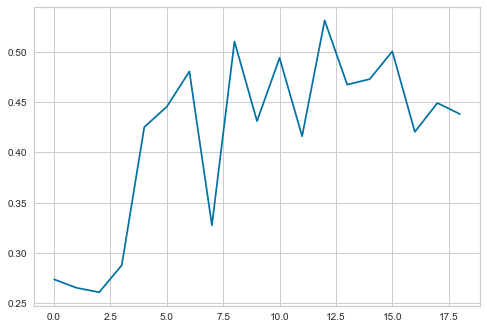

In [130]:
resumen['coherence'].plot()

<AxesSubplot:>

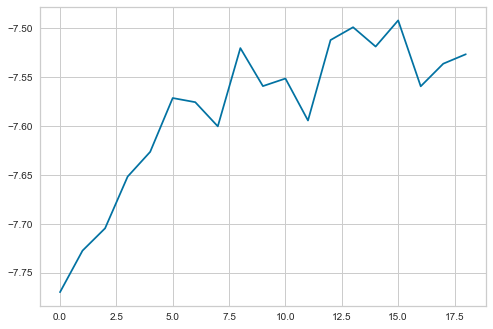

In [131]:
resumen['Perplexity'].plot()

In [132]:
numero = 12

lda = LdaModel(corpus=corpus, id2word=diccionario, 
               num_topics=numero, random_state=42, 
               chunksize=1000, passes=10, alpha='auto')

In [133]:
topicos = lda.print_topics(num_words=5, num_topics=20)
for topico in topicos:
    print(topico)

(0, '0.010*"red" + 0.010*"grupo" + 0.008*"cada" + 0.008*"resultado" + 0.008*"elemento"')
(1, '0.012*"modelo" + 0.011*"tripadvisor" + 0.010*"ranking" + 0.007*"hotel" + 0.007*"posición"')
(2, '0.024*"destino" + 0.022*"turístico" + 0.011*"dato" + 0.009*"servicio" + 0.009*"estudio"')
(3, '0.025*"país" + 0.012*"costo" + 0.012*"dato" + 0.011*"cluster" + 0.010*"algoritmo"')
(4, '0.001*"red" + 0.001*"resultado" + 0.000*"poder" + 0.000*"grupo" + 0.000*"cluster"')
(5, '0.012*"opinión" + 0.011*"palabra" + 0.011*"texto" + 0.010*"valoración" + 0.010*"análisis"')
(6, '0.020*"rata" + 0.017*"brazo" + 0.010*"laberinto" + 0.008*"modelo" + 0.008*"lce"')
(7, '0.000*"resultado" + 0.000*"algoritmo" + 0.000*"poder" + 0.000*"cluster" + 0.000*"red"')
(8, '0.015*"cluster" + 0.012*"empresa" + 0.009*"firma" + 0.009*"negocio" + 0.008*"electrónico"')
(9, '0.019*"documento" + 0.016*"aspecto" + 0.013*"resultado" + 0.011*"cluster" + 0.009*"término"')
(10, '0.022*"entrada" + 0.018*"red" + 0.016*"algoritmo" + 0.013*"pre

In [134]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
plot = pyLDAvis.gensim.prepare(lda, corpus, diccionario)
plot

pyLDAvis.save_html(plot, 'vis.html')

In [135]:
pyLDAvis.show(plot)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]

stopping Server...


127.0.0.1 - - [15/Dec/2021 21:28:26] "GET / HTTP/1.1" 200 -


In [136]:
lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda[corpus]]

In [137]:
topico=[]
score =[]

for i,x in lda_topic_assignment:
    topico.append(i)
    score.append(x)

topicos_asig = []
for i in topico:
    for x,y in topicos:
        if i == x:
            topicos_asig.append(y)
                

In [138]:
topico

[0, 3, 0, 11, 8, 1, 6, 0, 8, 10, 9, 8, 5, 1, 0, 5, 9, 9, 0, 2, 3, 0, 1]

In [139]:
df['Topico2'] = topico
df['Tema'] = topicos_asig

In [142]:
pd.options.display.max_colwidth = 120
df[['Cluster','Titulos','Topico2','Tema']].sort_values(by=['Cluster'])

Cluster  \
11        0   
19        0   
4         0   
13        0   
20        1   
18        1   
21        1   
9         1   
22        1   
6         1   
5         1   
3         1   
7         2   
16        2   
2         2   
1         2   
8         2   
0         2   
10        3   
12        3   
14        3   
15        3   
17        3   

                                                                                                                 Titulos  \
11                                                        Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013   
19                                                     Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017   
4                                               Paper Colombia Clusters como un modelo en el desarrollo de Negocios 2009   
13                                                    Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016   
20                                                Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010   
18                                     Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005   
21                                             Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011   
9                           Paper Ecuador Predicción de Caudales Basados  (RNA) para Períodos de Tiempo Sub Diarios 2015   
22                                       Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019   
6                                                            Paper ColomhiavModelado de ratas en laberintos con RNA 2009   
5                                   Paper Colombia Modelado precio del cafe colombiano en la bolsa de NY usando RNA 2007   
3                                  Paper Colombia Aplicación de Redes Neuronales Artificiales en Entornos Virtuales 2014   
7   Paper Cuba SemClustDML Agrupar artículos científicos basado información brindada por referencias bibliográficas 2011   
16           Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006   
2                                    Paper Colombia Analisis Cluster como tecnica exploratoria Datos Meteorologicos 2012   
1       Paper Bolivia Clustering, mediterraneidad y comercio internacional aplicación empírica de kmeans y medoides 2019   
8                                     Paper Ecuador Analisis De Clusteres Para La Clasificacion De Datos Economicos 2016   
0                Paper Argentina Analisis Numerico de diferentes criterios de similitud en algoritmos de Clustering 2006   
10                                                                 Paper España Analisis de sentimientos ontologico 2017   
12                                                                   Paper España articulo Minera  deOpiniones ANEW 2016   
14                                                                         Paper España Mineria Opiniones EmotiBlog 2011   
15                                                           Paper España Resumen I Analisis Valoraciones Sentitext 2010   
17                   Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016   

    Topico2  \
11        8   
19        2   
4         8   
13        1   
20        3   
18        0   
21        0   
9        10   
22        1   
6         6   
5         1   
3        11   
7         0   
16        9   
2         0   
1         3   
8         8   
0         0   
10        9   
12        5   
14        0   
15        5   
17        9   

                                                                                            Tema  
11     0.015*"cluster" + 0.012*"empresa" + 0.009*"firma" + 0.009*"negocio" + 0.008*"electrónico"  
19       0.024*"destino" + 0.022*"turístico" + 0.011*"dato" + 0.009*"servicio" + 0.009*"estudio"  
4      0

# Analisis de sentimiento

In [143]:
sentimientos={}
         
for line in open("13_CLS_Final.txt"):
    palabra, valor=line.split("\t")
    sentimientos[palabra]=int(valor)

sentimientos

{'confundir': -1,
 'exigen': 0,
 'actua': 0,
 'trier': 0,
 'sacando': -1,
 'conecta': 0,
 'accidentes': -1,
 'roza': 0,
 'altos': -1,
 'cortos': 1,
 'fumaban': 1,
 'agujas': 0,
 'saldar': -1,
 'almacenes': 0,
 'pasote': 1,
 'obligar': -1,
 'aprobaran': 0,
 'garantizaremos': 1,
 'torpes': 1,
 'incondicionales': 1,
 'bernardo': 0,
 'alegria': 1,
 'tenso': -1,
 'racismo': 1,
 'conste': 0,
 'pidieran': 1,
 'chaco': 1,
 'perdona': 0,
 'aguo': 1,
 'pus': 0,
 'concurrido': 0,
 'humana': 0,
 'helen': -1,
 'sinceridad': 1,
 'varas': 0,
 'emitidos': 1,
 'irregularidad': -1,
 'titulaciones': 1,
 'apuntes': 0,
 'comparen': -1,
 'coroneles': 1,
 'estricta': -1,
 'tomo': 1,
 'voy': 0,
 'pasen': 0,
 'docil': 0,
 'saneadas': 0,
 'tarda': -1,
 'desprestigio': -1,
 'bolsillo': -1,
 'aconseja': 0,
 'tito': 1,
 'grande': 1,
 'carreteras': -1,
 'desato': -1,
 'choque': -1,
 'herederos': -1,
 'interrumpir': -1,
 'falsificado': 1,
 'pareja': 0,
 'catedral': 0,
 'brindis': 1,
 'malgasten': -1,
 'trabajando': 

In [144]:
def score_sentimental(texto):
    puntaje = []
    for word in texto:
        puntaje.append(sentimientos.get(word,0))
    return sum(puntaje)

In [145]:
df['Score_sentimental']= df.apply(lambda x: score_sentimental(x['tokenizado']), axis=1)

In [146]:
pd.options.display.max_colwidth = 120
df[['Cluster','Titulos','Score_sentimental']].sort_values(by=['Cluster'])

Cluster  \
11        0   
19        0   
4         0   
13        0   
20        1   
18        1   
21        1   
9         1   
22        1   
6         1   
5         1   
3         1   
7         2   
16        2   
2         2   
1         2   
8         2   
0         2   
10        3   
12        3   
14        3   
15        3   
17        3   

                                                                                                                 Titulos  \
11                                                        Paper España Articulo de Los Impactos Del Ewom En Hoteles 2013   
19                                                     Paper Mexico EvaluacionDeDestinosTuristicos Ciencia de Datos 2017   
4                                               Paper Colombia Clusters como un modelo en el desarrollo de Negocios 2009   
13                                                    Paper España Fiabilidad Comentarios TripAdvisor y Booking.com 2016   
20                                                Paper Mexico Pronósticos para el Rendimiento Del Trigo usando RNA 2010   
18                                     Paper Mexico Clasificación de Defectos en Madera Redes Neurales Artificiales 2005   
21                                             Paper Mexico redes neuronales artificiales procesamiento de imagenes 2011   
9                           Paper Ecuador Predicción de Caudales Basados  (RNA) para Períodos de Tiempo Sub Diarios 2015   
22                                       Paper Peru Redes neuronales para predecir activos financieros mas liquidos 2019   
6                                                            Paper ColomhiavModelado de ratas en laberintos con RNA 2009   
5                                   Paper Colombia Modelado precio del cafe colombiano en la bolsa de NY usando RNA 2007   
3                                  Paper Colombia Aplicación de Redes Neuronales Artificiales en Entornos Virtuales 2014   
7   Paper Cuba SemClustDML Agrupar artículos científicos basado información brindada por referencias bibliográficas 2011   
16           Paper España Técnicas Difusas y No-difusas para el Clustering del Contenido de Páginas en un Sitio Web 2006   
2                                    Paper Colombia Analisis Cluster como tecnica exploratoria Datos Meteorologicos 2012   
1       Paper Bolivia Clustering, mediterraneidad y comercio internacional aplicación empírica de kmeans y medoides 2019   
8                                     Paper Ecuador Analisis De Clusteres Para La Clasificacion De Datos Economicos 2016   
0                Paper Argentina Analisis Numerico de diferentes criterios de similitud en algoritmos de Clustering 2006   
10                                                                 Paper España Analisis de sentimientos ontologico 2017   
12                                                                   Paper España articulo Minera  deOpiniones ANEW 2016   
14                                                                         Paper España Mineria Opiniones EmotiBlog 2011   
15                                                           Paper España Resumen I Analisis Valoraciones Sentitext 2010   
17                   Paper Mexico Analisis de sentimientos basado en aspectos  modelo para identificar la polaridad 2016   

    Score_sentimental  
11                127  
19                276  
4                 463  
13                100  
20                132  
18                 89  
21                372  
9                 146  
22                222  
6                  18  
5                 161  
3                  80  
7                 136  
16                 71  
2                  99  
1                 140  
8                   8  
0                 230  
10                154  
12                 84  
14                139  
15                146  
17                150

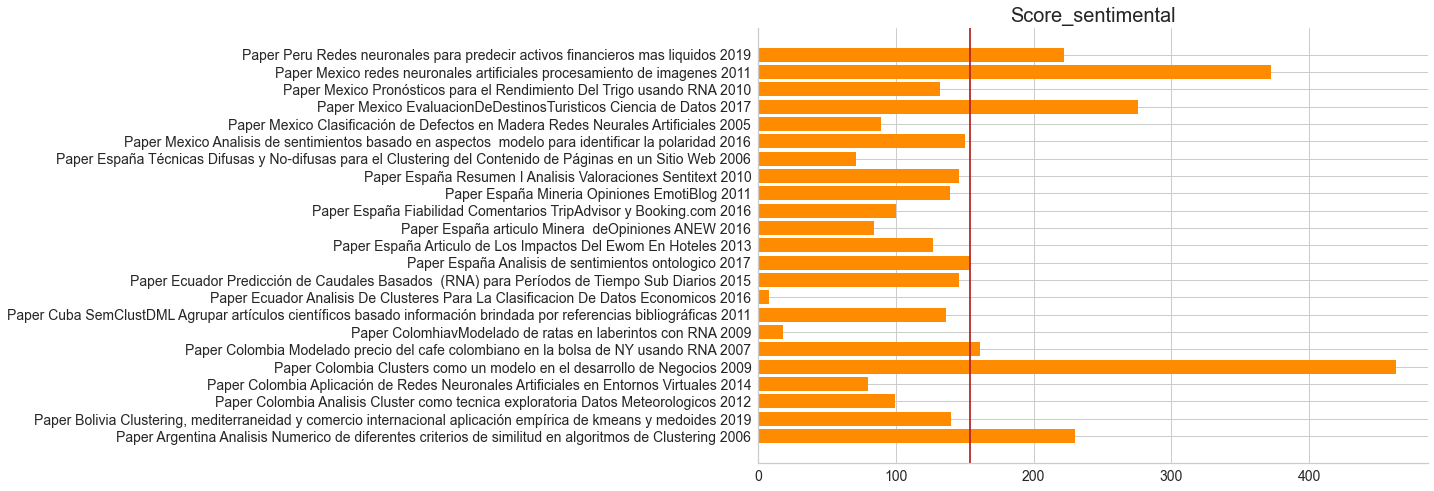

In [148]:
plt.figure(figsize=(12,8))
ax = plt.subplot(111)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.barh(df1['Titulos'],df['Score_sentimental'],color = 'darkorange')
plt.title('Score_sentimental',fontsize=20 )
plt.axvline(x=df['Score_sentimental'].mean(), color = 'firebrick')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [149]:
df.groupby('Cluster').agg({'Score_sentimental': 'mean'})

Score_sentimental
Cluster                   
0                    241.5
1                    152.5
2                    114.0
3                    134.6